# Initials

In [1]:
# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Download the dataset

In [2]:
# where to save the dataset
DATASET_PATH = os.path.join(PROJECT_ROOT_DIR, "dataset")

if not os.path.exists(DATASET_PATH):
    
    import kaggle
    
    # download dataset from kaggle
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files('mayank1897/condition-monitoring-of-hydraulic-systems',
                                      path=DATASET_PATH,
                                      unzip=True)

In [3]:
# dataset information
f = open("dataset/description.txt")
file_contents = f.read()
f.close()
print(file_contents)

Condition monitoring of hydraulic systems

Abtract: The data set addresses the condition assessment of a hydraulic test rig based on multi sensor data. Four fault types are superimposed with several severity grades impeding selective quantification.

Source:
Creator: ZeMA gGmbH, Eschberger Weg 46, 66121 Saarbrücken
Contact: t.schneider@zema.de, s.klein@zema.de, m.bastuck@lmt.uni-saarland.de, info@lmt.uni-saarland.de

Data Type: Multivariate, Time-Series
Task: Classification, Regression
Attribute Type: Categorical, Real
Area: CS/Engineering
Format Type: Matrix
Does your data set contain missing values? No

Number of Instances: 2205

Number of Attributes: 43680 (8x60 (1 Hz) + 2x600 (10 Hz) + 7x6000 (100 Hz))

Relevant Information:
The data set was experimentally obtained with a hydraulic test rig. This test rig consists of a primary working and a secondary cooling-filtration circuit which are connected via the oil tank [1], [2]. The system cyclically repeats constant load cycles (duratio

# Data preparation

## Pressure sensors 

In [4]:
# read data from files
a = []
for ps in ["PS1", "PS2", "PS3", "PS4", "PS5", "PS6"]:
    PS = np.genfromtxt("dataset/"+ps+".txt")
    a.append(PS)
ps1, ps2, ps3, ps4, ps5, ps6 = a

In [5]:
ps1, ps2, ps3, ps4, ps5, ps6

(array([[151.47, 151.45, 151.52, ..., 151.1 , 151.21, 151.19],
        [151.11, 151.12, 151.16, ..., 150.79, 150.8 , 150.86],
        [150.81, 150.79, 150.84, ..., 150.43, 150.54, 150.62],
        ...,
        [151.73, 151.78, 151.84, ..., 151.73, 151.73, 151.83],
        [151.77, 151.77, 151.75, ..., 151.68, 151.71, 151.78],
        [151.83, 151.78, 151.77, ..., 151.73, 151.71, 151.7 ]]),
 array([[125.5 , 125.39, 125.4 , ..., 125.11, 125.14, 125.1 ],
        [125.06, 125.08, 125.09, ..., 125.13, 125.09, 125.04],
        [125.13, 125.27, 125.23, ..., 124.73, 124.77, 124.88],
        ...,
        [125.41, 125.49, 125.63, ..., 125.84, 125.84, 125.94],
        [125.91, 125.73, 125.59, ..., 125.73, 125.86, 125.91],
        [125.88, 125.86, 125.84, ..., 125.77, 125.66, 125.77]]),
 array([[2.305, 2.305, 2.336, ..., 2.25 , 2.25 , 2.211],
        [2.281, 2.32 , 2.305, ..., 2.211, 2.195, 2.219],
        [2.227, 2.187, 2.156, ..., 2.305, 2.32 , 2.266],
        ...,
        [2.375, 2.437, 2.359, 

In [6]:
ps1.shape, ps2.shape, ps3.shape, ps4.shape, ps5.shape, ps6.shape

((2205, 6000),
 (2205, 6000),
 (2205, 6000),
 (2205, 6000),
 (2205, 6000),
 (2205, 6000))

As expected. 2205 instances with 6000 measurements pr instance (100 Hz * 60 s)

In [7]:
# check for NaN values
nan_count = 0
for ps in (ps1, ps2, ps3, ps4, ps5, ps6):
    nan_count += np.isnan(ps).sum()

nan_count

0

No invalid values

To deal with the time dimension of the attributes, one solution is to take the average over all 60 seconds per instance. By doing this, all instances only have one value pr attribute.

In [8]:
# save the average value over all 60 seconds per instance
ps1_mean = ps1.mean(axis=1)
ps2_mean = ps2.mean(axis=1)
ps3_mean = ps3.mean(axis=1)
ps4_mean = ps4.mean(axis=1)
ps5_mean = ps5.mean(axis=1)
ps6_mean = ps6.mean(axis=1)

In [9]:
# save all instances in a pandas dataframe
df = pd.DataFrame({"PS1 [bar]":ps1_mean,
                  "PS2 [bar]":ps2_mean,
                  "PS3 [bar]":ps3_mean,
                  "PS4 [bar]":ps4_mean,
                  "PS5 [bar]":ps5_mean,
                  "PS6 [bar]":ps6_mean,})

df.head()

,PS1 [bar],PS2 [bar],PS3 [bar],PS4 [bar],PS5 [bar],PS6 [bar]
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636


As an alternative to averaging over all 60 seconds, I will try to "convert" all attribute values to a 1 Hz signal by averaging over every n'th element of an instance attribute, where n is the frequency of the signal. Then I will explode the dataframe with respect to the 1 Hz attributes such that every sensor reading becomes its own instance, thus increasing the length of the dataframe from 2205 to 2205 * 60 = 132 300.

In [10]:
# taking the average of every 100th element of each attribute and saving it to a new array
ps1_1hz = np.mean(ps1.reshape(-1, 100), axis=1).reshape(2205, 60)
ps2_1hz = np.mean(ps2.reshape(-1, 100), axis=1).reshape(2205, 60)
ps3_1hz = np.mean(ps3.reshape(-1, 100), axis=1).reshape(2205, 60)
ps4_1hz = np.mean(ps4.reshape(-1, 100), axis=1).reshape(2205, 60)
ps5_1hz = np.mean(ps5.reshape(-1, 100), axis=1).reshape(2205, 60)
ps6_1hz = np.mean(ps6.reshape(-1, 100), axis=1).reshape(2205, 60)

In [11]:
# save all 1hz arrays to a new dataframe
df_ext = pd.DataFrame()
df_ext["PS1"] = list(ps1_1hz)
df_ext["PS2"] = list(ps2_1hz)
df_ext["PS3"] = list(ps3_1hz)
df_ext["PS4"] = list(ps4_1hz)
df_ext["PS5"] = list(ps5_1hz)
df_ext["PS6"] = list(ps6_1hz)
df_ext.head()

,PS1,PS2,PS3,PS4,PS5,PS6
0,"[176.89960000000002, 184.64199999999997, 189.8...","[11.866850000000001, 0.18786000000000003, 0.02...","[0.18954000000000001, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.96442, 9.95969, 9.964220000000001, 9.968670...","[9.841380000000001, 9.83686, 9.838190000000003..."
1,"[174.27069999999995, 191.35289999999998, 191.3...","[12.287560000000003, 0.22032999999999997, 0.02...","[0.18663, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.71038, 9.704509999999999, 9.697380000000003...","[9.600949999999997, 9.59831, 9.58497, 9.58003,..."
2,"[174.0188, 191.2384, 191.21829999999997, 191.2...","[11.827789999999998, 0.14628, 0.00048, 0.0, 0....","[0.1782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.602780000000001, 9.59102, 9.58121, 9.573, 9...","[9.498610000000001, 9.48868, 9.47973, 9.472500..."
3,"[173.65400000000005, 191.1975, 191.19189999999...","[11.514060000000002, 0.03498999999999999, 0.0,...","[0.18782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.49866, 9.50204, 9.497969999999999, 9.490000...","[9.398439999999999, 9.39801, 9.396159999999998..."
4,"[173.4353, 191.2045, 191.1586, 191.06980000000...","[12.29913, 0.13083, 0.012970000000000002, 0.0,...","[0.17859999999999998, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.401440000000001, 9.405990000000001, 9.40558...","[9.297709999999999, 9.306099999999997, 9.30532..."


A different approach to the above solution

In [12]:
# place all values in dataframe with length 2205 instances * 60 s * 100 Hz = 13 230 000 elements
df_ps = pd.DataFrame()
df_ps["PS1"] = ps1.flatten()
df_ps["PS2"] = ps2.flatten()
df_ps["PS3"] = ps3.flatten()
df_ps["PS4"] = ps4.flatten()
df_ps["PS5"] = ps5.flatten()
df_ps["PS6"] = ps6.flatten()

len(df_ps)

13230000

In [13]:
# take the average of every 100th element to "convert" to 1 Hz signal
df_ps = df_ps.groupby(np.arange(len(df_ps))//100).mean()

## Motor power

In [14]:
# read data from file
eps1 = np.genfromtxt("dataset/eps1.txt")

In [15]:
eps1

array([[2411.6, 2411.6, 2411.6, ..., 2409.6, 2409.6, 2409.6],
       [2409.6, 2409.6, 2409.6, ..., 2397.8, 2397.8, 2397.8],
       [2397.8, 2397.8, 2397.8, ..., 2383.8, 2383.8, 2383.8],
       ...,
       [2413.6, 2413.6, 2413.6, ..., 2413.6, 2413.4, 2413.6],
       [2413.6, 2413.6, 2413.6, ..., 2415.4, 2415.6, 2415.6],
       [2415.8, 2415.6, 2415.6, ..., 2416.8, 2417. , 2417. ]])

In [16]:
eps1.shape

(2205, 6000)

In [17]:
np.isnan(eps1).sum()

0

In [18]:
# save the average value over all 60 seconds per instance
eps1_mean = eps1.mean(axis=1)

In [19]:
# save all instances in dataframe
df["EPS1 [W]"] = eps1_mean

df.head()

,PS1 [bar],PS2 [bar],PS3 [bar],PS4 [bar],PS5 [bar],PS6 [bar],EPS1 [W]
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500


In [20]:
# average every 100th element
eps1_1hz = np.mean(eps1.reshape(-1, 100), axis=1).reshape(2205, 60)

In [21]:
# save in extended dataframe
df_ext["EPS1"] = list(eps1_1hz)

df_ext.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1
0,"[176.89960000000002, 184.64199999999997, 189.8...","[11.866850000000001, 0.18786000000000003, 0.02...","[0.18954000000000001, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.96442, 9.95969, 9.964220000000001, 9.968670...","[9.841380000000001, 9.83686, 9.838190000000003...","[2613.4679999999994, 2917.282, 2861.8400000000..."
1,"[174.27069999999995, 191.35289999999998, 191.3...","[12.287560000000003, 0.22032999999999997, 0.02...","[0.18663, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.71038, 9.704509999999999, 9.697380000000003...","[9.600949999999997, 9.59831, 9.58497, 9.58003,...","[2582.128, 2939.828, 2944.481999999998, 2944.3..."
2,"[174.0188, 191.2384, 191.21829999999997, 191.2...","[11.827789999999998, 0.14628, 0.00048, 0.0, 0....","[0.1782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.602780000000001, 9.59102, 9.58121, 9.573, 9...","[9.498610000000001, 9.48868, 9.47973, 9.472500...","[2569.6960000000004, 2928.8719999999994, 2934...."
3,"[173.65400000000005, 191.1975, 191.19189999999...","[11.514060000000002, 0.03498999999999999, 0.0,...","[0.18782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.49866, 9.50204, 9.497969999999999, 9.490000...","[9.398439999999999, 9.39801, 9.396159999999998...","[2557.66, 2922.245999999999, 2927.977999999999..."
4,"[173.4353, 191.2045, 191.1586, 191.06980000000...","[12.29913, 0.13083, 0.012970000000000002, 0.0,...","[0.17859999999999998, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.401440000000001, 9.405990000000001, 9.40558...","[9.297709999999999, 9.306099999999997, 9.30532...","[2546.4040000000005, 2913.7979999999993, 2920...."


In [22]:
# place all values in dataframe with length 2205 instances * 60 s * 100 Hz = 13 230 000 elements
df_eps = pd.DataFrame()
df_eps["EPS1"] = eps1.flatten()

df_eps.head()

,EPS1
0,2411.6
1,2411.6
2,2411.6
3,2411.6
4,2411.6


In [23]:
# take the average of every 100th element to "convert" to 1 Hz signal
df_eps = df_eps.groupby(np.arange(len(df_eps))//100).mean()

## Volume flow sensors

In [24]:
# read data from files
a = []
for fs in ["FS1", "FS2"]:
    FS = np.genfromtxt("dataset/"+fs+".txt")
    a.append(FS)
fs1, fs2 = a

In [25]:
fs1, fs2

(array([[8.99 , 0.77 , 0.641, ..., 7.876, 7.738, 8.036],
        [8.919, 0.815, 0.709, ..., 7.969, 7.963, 7.89 ],
        [9.179, 0.683, 0.528, ..., 7.873, 7.898, 7.952],
        ...,
        [8.17 , 0.686, 0.583, ..., 7.982, 7.859, 7.685],
        [8.496, 0.543, 0.366, ..., 7.758, 7.892, 7.793],
        [8.373, 0.776, 0.667, ..., 7.783, 7.943, 7.774]]),
 array([[10.179, 10.174, 10.151, ..., 10.374, 10.379, 10.373],
        [10.408, 10.429, 10.415, ..., 10.411, 10.434, 10.391],
        [10.392, 10.386, 10.404, ..., 10.35 , 10.356, 10.356],
        ...,
        [10.171, 10.169, 10.178, ..., 10.185, 10.185, 10.171],
        [10.166, 10.194, 10.189, ..., 10.165, 10.184, 10.189],
        [10.193, 10.174, 10.172, ..., 10.167, 10.173, 10.176]]))

In [26]:
fs1.shape, fs2.shape

((2205, 600), (2205, 600))

In [27]:
nan_count = 0
for fs in (fs1, fs2):
    nan_count += np.isnan(fs).sum()

nan_count

0

In [28]:
# save the average value over all 60 seconds per instance
fs1_mean = fs1.mean(axis=1)
fs2_mean = fs2.mean(axis=1)

In [29]:
# save all instances in dataframe
df["FS1 [l/min]"] = fs1_mean
df["FS2 [l/min]"] = fs2_mean

df.head()

,PS1 [bar],PS2 [bar],PS3 [bar],PS4 [bar],PS5 [bar],PS6 [bar],EPS1 [W],FS1 [l/min],FS2 [l/min]
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750


In [30]:
# take the average of every 10th element
fs1_1hz = np.mean(fs1.reshape(-1, 10), axis=1).reshape(2205, 60)
fs2_1hz = np.mean(fs2.reshape(-1, 10), axis=1).reshape(2205, 60)

In [31]:
# save in extended dataframe
df_ext["FS1"] = list(fs1_1hz)
df_ext["FS2"] = list(fs2_1hz)

df_ext.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2
0,"[176.89960000000002, 184.64199999999997, 189.8...","[11.866850000000001, 0.18786000000000003, 0.02...","[0.18954000000000001, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.96442, 9.95969, 9.964220000000001, 9.968670...","[9.841380000000001, 9.83686, 9.838190000000003...","[2613.4679999999994, 2917.282, 2861.8400000000...","[1.0413, 0.0007, 0.0023, 0.0008, 0.0014, 0.001...","[10.1691, 10.170399999999999, 10.1641000000000..."
1,"[174.27069999999995, 191.35289999999998, 191.3...","[12.287560000000003, 0.22032999999999997, 0.02...","[0.18663, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.71038, 9.704509999999999, 9.697380000000003...","[9.600949999999997, 9.59831, 9.58497, 9.58003,...","[2582.128, 2939.828, 2944.481999999998, 2944.3...","[1.0458, 0.0024000000000000002, 0.000600000000...","[10.4113, 10.4047, 10.398900000000001, 10.3891..."
2,"[174.0188, 191.2384, 191.21829999999997, 191.2...","[11.827789999999998, 0.14628, 0.00048, 0.0, 0....","[0.1782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.602780000000001, 9.59102, 9.58121, 9.573, 9...","[9.498610000000001, 9.48868, 9.47973, 9.472500...","[2569.6960000000004, 2928.8719999999994, 2934....","[1.0417999999999998, 0.0019, 0.000600000000000...","[10.4085, 10.4089, 10.385200000000001, 10.3933..."
3,"[173.65400000000005, 191.1975, 191.19189999999...","[11.514060000000002, 0.03498999999999999, 0.0,...","[0.18782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.49866, 9.50204, 9.497969999999999, 9.490000...","[9.398439999999999, 9.39801, 9.396159999999998...","[2557.66, 2922.245999999999, 2927.977999999999...","[1.0380999999999998, 0.0001, 0.002199999999999...","[10.342999999999998, 10.340599999999998, 10.34..."
4,"[173.4353, 191.2045, 191.1586, 191.06980000000...","[12.29913, 0.13083, 0.012970000000000002, 0.0,...","[0.17859999999999998, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.401440000000001, 9.405990000000001, 9.40558...","[9.297709999999999, 9.306099999999997, 9.30532...","[2546.4040000000005, 2913.7979999999993, 2920....","[0.9908999999999999, 0.0009000000000000001, 0....","[10.28, 10.2826, 10.2827, 10.2866, 10.2866, 10..."


In [32]:
# place all values in dataframe with length 2205 instances * 60 s * 10 Hz = 1 323 000 elements
df_fs = pd.DataFrame()
df_fs["FS1"] = fs1.flatten()
df_fs["FS2"] = fs2.flatten()

df_fs

,FS1,FS2
0,8.990,10.179
1,0.770,10.174
2,0.641,10.151
3,0.006,10.149
4,0.000,10.172
...,...,...
1322995,8.029,10.193
1322996,7.814,10.171
1322997,7.783,10.167
1322998,7.943,10.173


In [33]:
# take the average of every 10 element to "convert" to 1 Hz signal
df_fs = df_fs.groupby(np.arange(len(df_fs))//10).mean()

## Temperature sensors

In [34]:
# read data from files
a = []
for ts in ["TS1", "TS2", "TS3", "TS4"]:
    TS = np.genfromtxt("dataset/"+ts+".txt")
    a.append(TS)
ts1, ts2, ts3, ts4 = a

In [35]:
ts1, ts2, ts3, ts4

(array([[35.57 , 35.492, 35.469, ..., 36.102, 36.09 , 36.152],
        [36.156, 36.094, 35.992, ..., 37.422, 37.488, 37.477],
        [37.488, 37.391, 37.34 , ..., 38.543, 38.527, 38.621],
        ...,
        [35.434, 35.355, 35.262, ..., 35.41 , 35.434, 35.437],
        [35.449, 35.359, 35.277, ..., 35.414, 35.426, 35.441],
        [35.422, 35.336, 35.25 , ..., 35.434, 35.434, 35.426]]),
 array([[40.961, 40.949, 40.965, ..., 41.207, 41.129, 41.25 ],
        [41.258, 41.277, 41.262, ..., 42.031, 42.078, 42.105],
        [42.129, 42.105, 42.117, ..., 42.988, 43.039, 43.035],
        ...,
        [40.906, 40.898, 40.898, ..., 40.922, 40.906, 40.898],
        [40.906, 40.906, 40.891, ..., 40.926, 40.918, 40.898],
        [40.84 , 40.895, 40.883, ..., 40.883, 40.879, 40.891]]),
 array([[38.32 , 38.332, 38.32 , ..., 38.59 , 38.578, 38.594],
        [38.68 , 38.672, 38.668, ..., 39.238, 39.234, 39.25 ],
        [39.234, 39.246, 39.246, ..., 40.043, 40.051, 40.043],
        ...,
        [38.

In [36]:
ts1.shape, ts2.shape, ts3.shape, ts4.shape

((2205, 60), (2205, 60), (2205, 60), (2205, 60))

In [37]:
nan_count = 0
for ts in (ts1, ts2, ts3, ts4):
    nan_count += np.isnan(ts).sum()

nan_count

0

In [38]:
# save the average value over all 60 minutes per instance
ts1_mean = ts1.mean(axis=1)
ts2_mean = ts2.mean(axis=1)
ts3_mean = ts3.mean(axis=1)
ts4_mean = ts4.mean(axis=1)

In [39]:
# save all instances in dataframe
df["TS1 [deg C]"] = ts1_mean
df["TS2 [deg C]"] = ts2_mean
df["TS3 [deg C]"] = ts3_mean
df["TS4 [deg C]"] = ts4_mean

df.head()

,PS1 [bar],PS2 [bar],PS3 [bar],PS4 [bar],PS5 [bar],PS6 [bar],EPS1 [W],FS1 [l/min],FS2 [l/min],TS1 [deg C],TS2 [deg C],TS3 [deg C],TS4 [deg C]
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900


In [40]:
# save all original data in extended dataframe (no averaging needed, signal already 1hz)
df_ext["TS1"] = list(ts1)
df_ext["TS2"] = list(ts2)
df_ext["TS3"] = list(ts3)
df_ext["TS4"] = list(ts4)

df_ext.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4
0,"[176.89960000000002, 184.64199999999997, 189.8...","[11.866850000000001, 0.18786000000000003, 0.02...","[0.18954000000000001, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.96442, 9.95969, 9.964220000000001, 9.968670...","[9.841380000000001, 9.83686, 9.838190000000003...","[2613.4679999999994, 2917.282, 2861.8400000000...","[1.0413, 0.0007, 0.0023, 0.0008, 0.0014, 0.001...","[10.1691, 10.170399999999999, 10.1641000000000...","[35.57, 35.492, 35.469, 35.422, 35.414, 35.32,...","[40.961, 40.949, 40.965, 40.922, 40.879, 40.87...","[38.32, 38.332, 38.32, 38.324, 38.332, 38.324,...","[30.363, 30.375, 30.367, 30.367, 30.379, 30.37..."
1,"[174.27069999999995, 191.35289999999998, 191.3...","[12.287560000000003, 0.22032999999999997, 0.02...","[0.18663, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.71038, 9.704509999999999, 9.697380000000003...","[9.600949999999997, 9.59831, 9.58497, 9.58003,...","[2582.128, 2939.828, 2944.481999999998, 2944.3...","[1.0458, 0.0024000000000000002, 0.000600000000...","[10.4113, 10.4047, 10.398900000000001, 10.3891...","[36.156, 36.094, 35.992, 36.008, 35.992, 35.90...","[41.258, 41.277, 41.262, 41.223, 41.211, 41.17...","[38.68, 38.672, 38.668, 38.668, 38.742, 38.742...","[33.648, 33.723, 33.723, 33.734, 33.754, 33.80..."
2,"[174.0188, 191.2384, 191.21829999999997, 191.2...","[11.827789999999998, 0.14628, 0.00048, 0.0, 0....","[0.1782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.602780000000001, 9.59102, 9.58121, 9.573, 9...","[9.498610000000001, 9.48868, 9.47973, 9.472500...","[2569.6960000000004, 2928.8719999999994, 2934....","[1.0417999999999998, 0.0019, 0.000600000000000...","[10.4085, 10.4089, 10.385200000000001, 10.3933...","[37.488, 37.391, 37.34, 37.312, 37.223, 37.145...","[42.129, 42.105, 42.117, 42.066, 42.031, 41.96...","[39.234, 39.246, 39.246, 39.25, 39.246, 39.25,...","[35.113, 35.121, 35.098, 35.187, 35.191, 35.18..."
3,"[173.65400000000005, 191.1975, 191.19189999999...","[11.514060000000002, 0.03498999999999999, 0.0,...","[0.18782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.49866, 9.50204, 9.497969999999999, 9.490000...","[9.398439999999999, 9.39801, 9.396159999999998...","[2557.66, 2922.245999999999, 2927.977999999999...","[1.0380999999999998, 0.0001, 0.002199999999999...","[10.342999999999998, 10.340599999999998, 10.34...","[38.633, 38.535, 38.469, 38.379, 38.297, 38.22...","[43.039, 43.043, 43.039, 43.0, 42.957, 42.887,...","[40.086, 40.047, 40.102, 40.078, 40.043, 40.07...","[36.133, 36.105, 36.113, 36.199, 36.199, 36.19..."
4,"[173.4353, 191.2045, 191.1586, 191.06980000000...","[12.29913, 0.13083, 0.012970000000000002, 0.0,...","[0.17859999999999998, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.401440000000001, 9.405990000000001, 9.40558...","[9.297709999999999, 9.306099999999997, 9.30532...","[2546.4040000000005, 2913.7979999999993, 2920....","[0.9908999999999999, 0.0009000000000000001, 0....","[10.28, 10.2826, 10.2827, 10.2866, 10.2866, 10...","[39.461, 39.461, 39.375, 39.281, 39.203, 39.11...","[44.031, 44.027, 43.988, 43.961, 43.895, 43.87...","[40.934, 40.922, 40.922, 40.914, 40.922, 40.92...","[36.992, 37.004, 37.008, 37.078, 37.086, 37.10..."


In [41]:
# place all values in dataframe with length 2205 instances * 60 s * 1 Hz = 132 300 elements
df_ts = pd.DataFrame()
df_ts["TS1"] = ts1.flatten()
df_ts["TS2"] = ts2.flatten()
df_ts["TS3"] = ts3.flatten()
df_ts["TS4"] = ts4.flatten()

df_ts

,TS1,TS2,TS3,TS4
0,35.570,40.961,38.320,30.363
1,35.492,40.949,38.332,30.375
2,35.469,40.965,38.320,30.367
3,35.422,40.922,38.324,30.367
4,35.414,40.879,38.332,30.379
...,...,...,...,...
132295,35.441,40.910,38.195,30.395
132296,35.437,40.895,38.184,30.391
132297,35.434,40.883,38.184,30.395
132298,35.434,40.879,38.184,30.402


## Vibration sensor

In [42]:
# read data from file
vs1 = np.genfromtxt("dataset/vs1.txt")

In [43]:
vs1

array([[0.604, 0.605, 0.611, ..., 0.545, 0.535, 0.543],
       [0.59 , 0.61 , 0.626, ..., 0.533, 0.531, 0.534],
       [0.578, 0.603, 0.638, ..., 0.544, 0.53 , 0.534],
       ...,
       [0.566, 0.562, 0.561, ..., 0.512, 0.515, 0.517],
       [0.529, 0.539, 0.552, ..., 0.522, 0.52 , 0.528],
       [0.541, 0.553, 0.565, ..., 0.522, 0.522, 0.531]])

In [44]:
vs1.shape

(2205, 60)

In [45]:
np.isnan(vs1).sum()

0

In [46]:
# save the average value over all 60 minutes per instance
vs1_mean = vs1.mean(axis=1)

In [47]:
# save all instances in dataframe
df["VS1 [mm/s]"] = vs1_mean

df.head()

,PS1 [bar],PS2 [bar],PS3 [bar],PS4 [bar],PS5 [bar],PS6 [bar],EPS1 [W],FS1 [l/min],FS2 [l/min],TS1 [deg C],TS2 [deg C],TS3 [deg C],TS4 [deg C],VS1 [mm/s]
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367


In [48]:
# save all original data in extended dataframe (no averaging needed, signal already 1hz)
df_ext["VS1"] = list(vs1)

df_ext.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1
0,"[176.89960000000002, 184.64199999999997, 189.8...","[11.866850000000001, 0.18786000000000003, 0.02...","[0.18954000000000001, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.96442, 9.95969, 9.964220000000001, 9.968670...","[9.841380000000001, 9.83686, 9.838190000000003...","[2613.4679999999994, 2917.282, 2861.8400000000...","[1.0413, 0.0007, 0.0023, 0.0008, 0.0014, 0.001...","[10.1691, 10.170399999999999, 10.1641000000000...","[35.57, 35.492, 35.469, 35.422, 35.414, 35.32,...","[40.961, 40.949, 40.965, 40.922, 40.879, 40.87...","[38.32, 38.332, 38.32, 38.324, 38.332, 38.324,...","[30.363, 30.375, 30.367, 30.367, 30.379, 30.37...","[0.604, 0.605, 0.611, 0.603, 0.608, 0.608, 0.6..."
1,"[174.27069999999995, 191.35289999999998, 191.3...","[12.287560000000003, 0.22032999999999997, 0.02...","[0.18663, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.71038, 9.704509999999999, 9.697380000000003...","[9.600949999999997, 9.59831, 9.58497, 9.58003,...","[2582.128, 2939.828, 2944.481999999998, 2944.3...","[1.0458, 0.0024000000000000002, 0.000600000000...","[10.4113, 10.4047, 10.398900000000001, 10.3891...","[36.156, 36.094, 35.992, 36.008, 35.992, 35.90...","[41.258, 41.277, 41.262, 41.223, 41.211, 41.17...","[38.68, 38.672, 38.668, 38.668, 38.742, 38.742...","[33.648, 33.723, 33.723, 33.734, 33.754, 33.80...","[0.59, 0.61, 0.626, 0.62, 0.623, 0.619, 0.617,..."
2,"[174.0188, 191.2384, 191.21829999999997, 191.2...","[11.827789999999998, 0.14628, 0.00048, 0.0, 0....","[0.1782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.602780000000001, 9.59102, 9.58121, 9.573, 9...","[9.498610000000001, 9.48868, 9.47973, 9.472500...","[2569.6960000000004, 2928.8719999999994, 2934....","[1.0417999999999998, 0.0019, 0.000600000000000...","[10.4085, 10.4089, 10.385200000000001, 10.3933...","[37.488, 37.391, 37.34, 37.312, 37.223, 37.145...","[42.129, 42.105, 42.117, 42.066, 42.031, 41.96...","[39.234, 39.246, 39.246, 39.25, 39.246, 39.25,...","[35.113, 35.121, 35.098, 35.187, 35.191, 35.18...","[0.578, 0.603, 0.638, 0.651, 0.652, 0.662, 0.6..."
3,"[173.65400000000005, 191.1975, 191.19189999999...","[11.514060000000002, 0.03498999999999999, 0.0,...","[0.18782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.49866, 9.50204, 9.497969999999999, 9.490000...","[9.398439999999999, 9.39801, 9.396159999999998...","[2557.66, 2922.245999999999, 2927.977999999999...","[1.0380999999999998, 0.0001, 0.002199999999999...","[10.342999999999998, 10.340599999999998, 10.34...","[38.633, 38.535, 38.469, 38.379, 38.297, 38.22...","[43.039, 43.043, 43.039, 43.0, 42.957, 42.887,...","[40.086, 40.047, 40.102, 40.078, 40.043, 40.07...","[36.133, 36.105, 36.113, 36.199, 36.199, 36.19...","[0.565, 0.591, 0.608, 0.614, 0.623, 0.645, 0.6..."
4,"[173.4353, 191.2045, 191.1586, 191.06980000000...","[12.29913, 0.13083, 0.012970000000000002, 0.0,...","[0.17859999999999998, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.401440000000001, 9.405990000000001, 9.40558...","[9.297709999999999, 9.306099999999997, 9.30532...","[2546.4040000000005, 2913.7979999999993, 2920....","[0.9908999999999999, 0.0009000000000000001, 0....","[10.28, 10.2826, 10.2827, 10.2866, 10.2866, 10...","[39.461, 39.461, 39.375, 39.281, 39.203, 39.11...","[44.031, 44.027, 43.988, 43.961, 43.895, 43.87...","[40.934, 40.922, 40.922, 40.914, 40.922, 40.92...","[36.992, 37.004, 37.008, 37.078, 37.086, 37.10...","[0.57, 0.6, 0.623, 0.636, 0.644, 0.642, 0.651,..."


In [49]:
# place all values in dataframe with length 2205 instances * 60 s * 1 Hz = 132 300 elements
df_vs = pd.DataFrame()
df_vs["VS1"] = vs1.flatten()

df_vs

,VS1
0,0.604
1,0.605
2,0.611
3,0.603
4,0.608
...,...
132295,0.516
132296,0.528
132297,0.522
132298,0.522


## Cooling efficiency

In [50]:
# read data from file
ce = np.genfromtxt("dataset/ce.txt")

In [51]:
ce.shape

(2205, 60)

In [52]:
np.isnan(ce).sum()

0

In [53]:
# save the average value over all 60 minutes per instance
ce_mean = ce.mean(axis=1)

In [54]:
# save all instances in dataframe
df["CE [%]"] = ce_mean

df.head()

,PS1 [bar],PS2 [bar],PS3 [bar],PS4 [bar],PS5 [bar],PS6 [bar],EPS1 [W],FS1 [l/min],FS2 [l/min],TS1 [deg C],TS2 [deg C],TS3 [deg C],TS4 [deg C],VS1 [mm/s],CE [%]
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017


In [55]:
# save all original data in extended dataframe (no averaging needed, signal already 1hz)
df_ext["CE"] = list(ce)

df_ext.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE
0,"[176.89960000000002, 184.64199999999997, 189.8...","[11.866850000000001, 0.18786000000000003, 0.02...","[0.18954000000000001, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.96442, 9.95969, 9.964220000000001, 9.968670...","[9.841380000000001, 9.83686, 9.838190000000003...","[2613.4679999999994, 2917.282, 2861.8400000000...","[1.0413, 0.0007, 0.0023, 0.0008, 0.0014, 0.001...","[10.1691, 10.170399999999999, 10.1641000000000...","[35.57, 35.492, 35.469, 35.422, 35.414, 35.32,...","[40.961, 40.949, 40.965, 40.922, 40.879, 40.87...","[38.32, 38.332, 38.32, 38.324, 38.332, 38.324,...","[30.363, 30.375, 30.367, 30.367, 30.379, 30.37...","[0.604, 0.605, 0.611, 0.603, 0.608, 0.608, 0.6...","[47.202, 47.273, 47.25, 47.332, 47.213, 47.372..."
1,"[174.27069999999995, 191.35289999999998, 191.3...","[12.287560000000003, 0.22032999999999997, 0.02...","[0.18663, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.71038, 9.704509999999999, 9.697380000000003...","[9.600949999999997, 9.59831, 9.58497, 9.58003,...","[2582.128, 2939.828, 2944.481999999998, 2944.3...","[1.0458, 0.0024000000000000002, 0.000600000000...","[10.4113, 10.4047, 10.398900000000001, 10.3891...","[36.156, 36.094, 35.992, 36.008, 35.992, 35.90...","[41.258, 41.277, 41.262, 41.223, 41.211, 41.17...","[38.68, 38.672, 38.668, 38.668, 38.742, 38.742...","[33.648, 33.723, 33.723, 33.734, 33.754, 33.80...","[0.59, 0.61, 0.626, 0.62, 0.623, 0.619, 0.617,...","[29.208, 28.822, 28.805, 28.922, 28.591, 28.64..."
2,"[174.0188, 191.2384, 191.21829999999997, 191.2...","[11.827789999999998, 0.14628, 0.00048, 0.0, 0....","[0.1782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.602780000000001, 9.59102, 9.58121, 9.573, 9...","[9.498610000000001, 9.48868, 9.47973, 9.472500...","[2569.6960000000004, 2928.8719999999994, 2934....","[1.0417999999999998, 0.0019, 0.000600000000000...","[10.4085, 10.4089, 10.385200000000001, 10.3933...","[37.488, 37.391, 37.34, 37.312, 37.223, 37.145...","[42.129, 42.105, 42.117, 42.066, 42.031, 41.96...","[39.234, 39.246, 39.246, 39.25, 39.246, 39.25,...","[35.113, 35.121, 35.098, 35.187, 35.191, 35.18...","[0.578, 0.603, 0.638, 0.651, 0.652, 0.662, 0.6...","[23.554, 23.521, 23.527, 23.008, 23.042, 23.05..."
3,"[173.65400000000005, 191.1975, 191.19189999999...","[11.514060000000002, 0.03498999999999999, 0.0,...","[0.18782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.49866, 9.50204, 9.497969999999999, 9.490000...","[9.398439999999999, 9.39801, 9.396159999999998...","[2557.66, 2922.245999999999, 2927.977999999999...","[1.0380999999999998, 0.0001, 0.002199999999999...","[10.342999999999998, 10.340599999999998, 10.34...","[38.633, 38.535, 38.469, 38.379, 38.297, 38.22...","[43.039, 43.043, 43.039, 43.0, 42.957, 42.887,...","[40.086, 40.047, 40.102, 40.078, 40.043, 40.07...","[36.133, 36.105, 36.113, 36.199, 36.199, 36.19...","[0.565, 0.591, 0.608, 0.614, 0.623, 0.645, 0.6...","[21.54, 21.419, 21.565, 20.857, 21.052, 21.039..."
4,"[173.4353, 191.2045, 191.1586, 191.06980000000...","[12.29913, 0.13083, 0.012970000000000002, 0.0,...","[0.17859999999999998, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.401440000000001, 9.405990000000001, 9.40558...","[9.297709999999999, 9.306099999999997, 9.30532...","[2546.4040000000005, 2913.7979999999993, 2920....","[0.9908999999999999, 0.0009000000000000001, 0....","[10.28, 10.2826, 10.2827, 10.2866, 10.2866, 10...","[39.461, 39.461, 39.375, 39.281, 39.203, 39.11...","[44.031, 44.027, 43.988, 43.961, 43.895, 43.87...","[40.934, 40.922, 40.922, 40.914, 40.922, 40.92...","[36.992, 37.004, 37.008, 37.078, 37.086, 37.10...","[0.57, 0.6, 0.623, 0.636, 0.644, 0.642, 0.651,...","[20.46, 20.298, 20.35, 19.867, 19.997, 19.972,..."


In [56]:
# place all values in dataframe with length 2205 instances * 60 s * 1 Hz = 132 300 elements
df_ce = pd.DataFrame()
df_ce["CE1"] = ce.flatten()

df_ce

,CE1
0,47.202
1,47.273
2,47.250
3,47.332
4,47.213
...,...
132295,46.355
132296,46.432
132297,46.384
132298,46.479


## Cooling power

In [57]:
# read data from file
cp = np.genfromtxt("dataset/cp.txt")

In [58]:
cp.shape

(2205, 60)

In [59]:
np.isnan(cp).sum()

0

In [60]:
# save the average value over all 60 minutes per instance
cp_mean = cp.mean(axis=1)

In [61]:
# save all instances in dataframe
df["CP [kW]"] = cp_mean

df.head()

,PS1 [bar],PS2 [bar],PS3 [bar],PS4 [bar],PS5 [bar],PS6 [bar],EPS1 [W],FS1 [l/min],FS2 [l/min],TS1 [deg C],TS2 [deg C],TS3 [deg C],TS4 [deg C],VS1 [mm/s],CE [%],CP [kW]
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467


In [62]:
# save all original data in extended dataframe (no averaging needed, signal already 1hz)
df_ext["CP"] = list(cp)

df_ext.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP
0,"[176.89960000000002, 184.64199999999997, 189.8...","[11.866850000000001, 0.18786000000000003, 0.02...","[0.18954000000000001, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.96442, 9.95969, 9.964220000000001, 9.968670...","[9.841380000000001, 9.83686, 9.838190000000003...","[2613.4679999999994, 2917.282, 2861.8400000000...","[1.0413, 0.0007, 0.0023, 0.0008, 0.0014, 0.001...","[10.1691, 10.170399999999999, 10.1641000000000...","[35.57, 35.492, 35.469, 35.422, 35.414, 35.32,...","[40.961, 40.949, 40.965, 40.922, 40.879, 40.87...","[38.32, 38.332, 38.32, 38.324, 38.332, 38.324,...","[30.363, 30.375, 30.367, 30.367, 30.379, 30.37...","[0.604, 0.605, 0.611, 0.603, 0.608, 0.608, 0.6...","[47.202, 47.273, 47.25, 47.332, 47.213, 47.372...","[2.184, 2.184, 2.184, 2.185, 2.178, 2.188, 2.1..."
1,"[174.27069999999995, 191.35289999999998, 191.3...","[12.287560000000003, 0.22032999999999997, 0.02...","[0.18663, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.71038, 9.704509999999999, 9.697380000000003...","[9.600949999999997, 9.59831, 9.58497, 9.58003,...","[2582.128, 2939.828, 2944.481999999998, 2944.3...","[1.0458, 0.0024000000000000002, 0.000600000000...","[10.4113, 10.4047, 10.398900000000001, 10.3891...","[36.156, 36.094, 35.992, 36.008, 35.992, 35.90...","[41.258, 41.277, 41.262, 41.223, 41.211, 41.17...","[38.68, 38.672, 38.668, 38.668, 38.742, 38.742...","[33.648, 33.723, 33.723, 33.734, 33.754, 33.80...","[0.59, 0.61, 0.626, 0.62, 0.623, 0.619, 0.617,...","[29.208, 28.822, 28.805, 28.922, 28.591, 28.64...","[1.414, 1.384, 1.385, 1.384, 1.382, 1.385, 1.3..."
2,"[174.0188, 191.2384, 191.21829999999997, 191.2...","[11.827789999999998, 0.14628, 0.00048, 0.0, 0....","[0.1782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.602780000000001, 9.59102, 9.58121, 9.573, 9...","[9.498610000000001, 9.48868, 9.47973, 9.472500...","[2569.6960000000004, 2928.8719999999994, 2934....","[1.0417999999999998, 0.0019, 0.000600000000000...","[10.4085, 10.4089, 10.385200000000001, 10.3933...","[37.488, 37.391, 37.34, 37.312, 37.223, 37.145...","[42.129, 42.105, 42.117, 42.066, 42.031, 41.96...","[39.234, 39.246, 39.246, 39.25, 39.246, 39.25,...","[35.113, 35.121, 35.098, 35.187, 35.191, 35.18...","[0.578, 0.603, 0.638, 0.651, 0.652, 0.662, 0.6...","[23.554, 23.521, 23.527, 23.008, 23.042, 23.05...","[1.159, 1.157, 1.157, 1.134, 1.129, 1.137, 1.1..."
3,"[173.65400000000005, 191.1975, 191.19189999999...","[11.514060000000002, 0.03498999999999999, 0.0,...","[0.18782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.49866, 9.50204, 9.497969999999999, 9.490000...","[9.398439999999999, 9.39801, 9.396159999999998...","[2557.66, 2922.245999999999, 2927.977999999999...","[1.0380999999999998, 0.0001, 0.002199999999999...","[10.342999999999998, 10.340599999999998, 10.34...","[38.633, 38.535, 38.469, 38.379, 38.297, 38.22...","[43.039, 43.043, 43.039, 43.0, 42.957, 42.887,...","[40.086, 40.047, 40.102, 40.078, 40.043, 40.07...","[36.133, 36.105, 36.113, 36.199, 36.199, 36.19...","[0.565, 0.591, 0.608, 0.614, 0.623, 0.645, 0.6...","[21.54, 21.419, 21.565, 20.857, 21.052, 21.039...","[1.101, 1.086, 1.107, 1.075, 1.073, 1.067, 1.0..."
4,"[173.4353, 191.2045, 191.1586, 191.06980000000...","[12.29913, 0.13083, 0.012970000000000002, 0.0,...","[0.17859999999999998, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.401440000000001, 9.405990000000001, 9.40558...","[9.297709999999999, 9.306099999999997, 9.30532...","[2546.4040000000005, 2913.7979999999993, 2920....","[0.9908999999999999, 0.0009000000000000001, 0....","[10.28, 10.2826, 10.2827, 10.2866, 10.2866, 10...","[39.461, 39.461, 39.375, 39.281, 39.203, 39.11...","[44.031, 44.027, 43.988, 43.961, 43.895, 43.87...","[40.934, 40.922, 40.922, 

In [63]:
# place all values in dataframe with length 2205 instances * 60 s * 1 Hz = 132 300 elements
df_cp = pd.DataFrame()
df_cp["CP1"] = cp.flatten()

df_cp

,CP1
0,2.184
1,2.184
2,2.184
3,2.185
4,2.178
...,...
132295,2.134
132296,2.146
132297,2.144
132298,2.136


## Efficiency factor

In [64]:
# read data from file
se = np.genfromtxt("dataset/se.txt")

In [65]:
se

array([[68.039,  0.   ,  0.   , ..., 68.159, 68.159, 68.264],
       [68.264,  0.   ,  0.   , ..., 68.528, 68.528, 68.595],
       [68.595,  0.   ,  0.   , ..., 68.758, 68.758, 68.628],
       ...,
       [68.094,  0.   ,  0.   , ..., 68.33 , 68.33 , 68.083],
       [68.083,  0.   ,  0.   , ..., 68.411, 68.411, 68.077],
       [68.077,  0.   ,  0.   , ..., 68.258, 68.258, 68.117]])

In [66]:
se.shape

(2205, 60)

In [67]:
np.isnan(se).sum()

0

In [68]:
# save the average value over all 60 minutes per instance
se_mean = se.mean(axis=1)

In [69]:
# save all instances in dataframe
df["SE [%]"] = se_mean

df.head()

,PS1 [bar],PS2 [bar],PS3 [bar],PS4 [bar],PS5 [bar],PS6 [bar],EPS1 [W],FS1 [l/min],FS2 [l/min],TS1 [deg C],TS2 [deg C],TS3 [deg C],TS4 [deg C],VS1 [mm/s],CE [%],CP [kW],SE [%]
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267


In [70]:
# save all original data in extended dataframe (no averaging needed, signal already 1hz)
df_ext["SE"] = list(se)

df_ext.head()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,"[176.89960000000002, 184.64199999999997, 189.8...","[11.866850000000001, 0.18786000000000003, 0.02...","[0.18954000000000001, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.96442, 9.95969, 9.964220000000001, 9.968670...","[9.841380000000001, 9.83686, 9.838190000000003...","[2613.4679999999994, 2917.282, 2861.8400000000...","[1.0413, 0.0007, 0.0023, 0.0008, 0.0014, 0.001...","[10.1691, 10.170399999999999, 10.1641000000000...","[35.57, 35.492, 35.469, 35.422, 35.414, 35.32,...","[40.961, 40.949, 40.965, 40.922, 40.879, 40.87...","[38.32, 38.332, 38.32, 38.324, 38.332, 38.324,...","[30.363, 30.375, 30.367, 30.367, 30.379, 30.37...","[0.604, 0.605, 0.611, 0.603, 0.608, 0.608, 0.6...","[47.202, 47.273, 47.25, 47.332, 47.213, 47.372...","[2.184, 2.184, 2.184, 2.185, 2.178, 2.188, 2.1...","[68.039, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
1,"[174.27069999999995, 191.35289999999998, 191.3...","[12.287560000000003, 0.22032999999999997, 0.02...","[0.18663, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.71038, 9.704509999999999, 9.697380000000003...","[9.600949999999997, 9.59831, 9.58497, 9.58003,...","[2582.128, 2939.828, 2944.481999999998, 2944.3...","[1.0458, 0.0024000000000000002, 0.000600000000...","[10.4113, 10.4047, 10.398900000000001, 10.3891...","[36.156, 36.094, 35.992, 36.008, 35.992, 35.90...","[41.258, 41.277, 41.262, 41.223, 41.211, 41.17...","[38.68, 38.672, 38.668, 38.668, 38.742, 38.742...","[33.648, 33.723, 33.723, 33.734, 33.754, 33.80...","[0.59, 0.61, 0.626, 0.62, 0.623, 0.619, 0.617,...","[29.208, 28.822, 28.805, 28.922, 28.591, 28.64...","[1.414, 1.384, 1.385, 1.384, 1.382, 1.385, 1.3...","[68.264, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
2,"[174.0188, 191.2384, 191.21829999999997, 191.2...","[11.827789999999998, 0.14628, 0.00048, 0.0, 0....","[0.1782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.602780000000001, 9.59102, 9.58121, 9.573, 9...","[9.498610000000001, 9.48868, 9.47973, 9.472500...","[2569.6960000000004, 2928.8719999999994, 2934....","[1.0417999999999998, 0.0019, 0.000600000000000...","[10.4085, 10.4089, 10.385200000000001, 10.3933...","[37.488, 37.391, 37.34, 37.312, 37.223, 37.145...","[42.129, 42.105, 42.117, 42.066, 42.031, 41.96...","[39.234, 39.246, 39.246, 39.25, 39.246, 39.25,...","[35.113, 35.121, 35.098, 35.187, 35.191, 35.18...","[0.578, 0.603, 0.638, 0.651, 0.652, 0.662, 0.6...","[23.554, 23.521, 23.527, 23.008, 23.042, 23.05...","[1.159, 1.157, 1.157, 1.134, 1.129, 1.137, 1.1...","[68.595, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
3,"[173.65400000000005, 191.1975, 191.19189999999...","[11.514060000000002, 0.03498999999999999, 0.0,...","[0.18782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.49866, 9.50204, 9.497969999999999, 9.490000...","[9.398439999999999, 9.39801, 9.396159999999998...","[2557.66, 2922.245999999999, 2927.977999999999...","[1.0380999999999998, 0.0001, 0.002199999999999...","[10.342999999999998, 10.340599999999998, 10.34...","[38.633, 38.535, 38.469, 38.379, 38.297, 38.22...","[43.039, 43.043, 43.039, 43.0, 42.957, 42.887,...","[40.086, 40.047, 40.102, 40.078, 40.043, 40.07...","[36.133, 36.105, 36.113, 36.199, 36.199, 36.19...","[0.565, 0.591, 0.608, 0.614, 0.623, 0.645, 0.6...","[21.54, 21.419, 21.565, 20.857, 21.052, 21.039...","[1.101, 1.086, 1.107, 1.075, 1.073, 1.067, 1.0...","[68.628, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
4,"[173.4353, 191.2045, 191.1586, 191.06980000000...","[12.29913, 0.13083, 0.012970000000000002, 0.0,...","[0.17859999999999998, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[9.401440000000001, 9.405990000000001, 9.40558...","[9.297709999999999, 9.306099999999997, 9.30532...","[2546.4040000000005, 2913.7979999999993, 2920....","[0.9908999999999999, 0

In [71]:
# place all values in dataframe with length 2205 instances * 60 s * 1 Hz = 132 300 elements
df_se = pd.DataFrame()
df_se["SE1"] = se.flatten()

df_se

,SE1
0,68.039
1,0.000
2,0.000
3,0.000
4,0.000
...,...
132295,68.167
132296,68.167
132297,68.258
132298,68.258


In [72]:
# full dataframe with all sensor values (1hz) as its own instance
df_full = pd.concat([df_ps, df_eps, df_fs, df_ts, df_vs, df_ce, df_cp, df_se], axis=1)

df_full

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE1,CP1,SE1
0,176.8996,11.86685,0.18954,0.00000,9.96442,9.84138,2613.468,1.0413,10.1691,35.570,40.961,38.320,30.363,0.604,47.202,2.184,68.039
1,184.6420,0.18786,0.00000,0.00000,9.95969,9.83686,2917.282,0.0007,10.1704,35.492,40.949,38.332,30.375,0.605,47.273,2.184,0.000
2,189.8996,0.02133,0.00000,0.00000,9.96422,9.83819,2861.840,0.0023,10.1641,35.469,40.965,38.320,30.367,0.611,47.250,2.184,0.000
3,191.3442,0.00283,0.00000,0.00000,9.96867,9.84618,2946.474,0.0008,10.1751,35.422,40.922,38.324,30.367,0.603,47.332,2.185,0.000
4,191.2833,0.00000,0.00000,0.00000,9.97288,9.84887,2946.164,0.0014,10.1730,35.414,40.879,38.332,30.379,0.608,47.213,2.178,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132295,151.7397,125.67640,2.35381,10.21349,9.98025,9.85935,2415.880,7.8623,10.1889,35.441,40.910,38.195,30.395,0.516,46.355,2.134,68.167
132296,151.7571,125.67780,2.32953,10.21272,9.98103,9.86011,2415.692,7.8369,10.1826,35.437,40.895,38.184,30.391,0.528,46.432,2.146,68.167
132297,151.7946,125.72750,2.35844,10.21637,9.97812,9.86092,2416.870,7.8729,10.1862,35.434,40.883,38.184,30.395,0.522,46.384,2.144,68.258
132298,151.7378,125.71310,2.29595,10.21528,9.98258,9.86093,2415.968,7.8685,10.1861,35.434,40.879,38.184,30.402,0.522,46.479,2.136,68.258


In [73]:
df_ps.shape

(132300, 6)

## Target conditions

In [74]:
# read data from file
target = np.genfromtxt("dataset/profile.txt")

In [75]:
target

array([[  3., 100.,   0., 130.,   1.],
       [  3., 100.,   0., 130.,   1.],
       [  3., 100.,   0., 130.,   1.],
       ...,
       [100., 100.,   0.,  90.,   0.],
       [100., 100.,   0.,  90.,   0.],
       [100., 100.,   0.,  90.,   0.]])

In [76]:
target.shape

(2205, 5)

As expected, 2205 instances and 5 targets

In [77]:
np.isnan(target).sum()

0

In [78]:
# save all attributes in dataframe
df["cooler_condition"] = target[:,0]
df["valve_condition"] = target[:,1]
df["internal_pump_leakage"] = target[:,2]
df["hydraulic_accumulator"] = target[:,3]
df["stable_flag"] = target[:,4]

In [79]:
df

,PS1 [bar],PS2 [bar],PS3 [bar],PS4 [bar],PS5 [bar],PS6 [bar],EPS1 [W],FS1 [l/min],FS2 [l/min],TS1 [deg C],...,TS4 [deg C],VS1 [mm/s],CE [%],CP [kW],SE [%],cooler_condition,valve_condition,internal_pump_leakage,hydraulic_accumulator,stable_flag
0,160.673492,109.466914,1.991475,0.000000,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,...,31.745250,0.576950,39.601350,1.862750,59.157183,3.0,100.0,0.0,130.0,1.0
1,160.603320,109.354890,1.976234,0.000000,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,...,34.493867,0.565850,25.786433,1.255550,59.335617,3.0,100.0,0.0,130.0,1.0
2,160.347720,109.158845,1.972224,0.000000,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,...,35.646150,0.576533,22.218233,1.113217,59.543150,3.0,100.0,0.0,130.0,1.0
3,160.188088,109.064807,1.946576,0.000000,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,...,36.579467,0.569267,20.459817,1.062150,59.794900,3.0,100.0,0.0,130.0,1.0
4,160.000472,108.931434,1.922707,0.000000,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,...,37.427900,0.577367,19.787017,1.070467,59.455267,3.0,100.0,0.0,130.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,161.227572,109.779581,2.001438,10.202473,9.972037,9.850361,2543.911033,6.689930,10.184515,35.313783,...,30.404733,0.550833,46.628517,2.160600,59.033100,100.0,100.0,0.0,90.0,0.0
2201,161.206070,109.787481,1.998781,10.197919,9.966184,9.844854,2543.411333,6.692182,10.177767,35.321600,...,30.416233,0.547483,46.689817,2.151450,59.068000,100.0,100.0,0.0,90.0,0.0
2202,161.192120,109.756174,1.993436,10.196824,9.964329,9.842629,2542.729767,6.693277,10.176172,35.319183,...,30.426250,0.545233,46.472300,2.143300,59.132350,100.0,100.0,0.0,90.0,0.0
2203,161.208917,109.793884,2.007077,10.198588,9.968232,9.846690,2544.046333,6.684128,10.178353,35.324767,...,30.414283,0.537017,46.544967,2.148483,58.970800,100.0,100.0,0.0,90.0,0.0


In [80]:
# save all attributes in extended dataframe
df_ext["cooler_condition"] = target[:,0]
df_ext["valve_condition"] = target[:,1]
df_ext["internal_pump_leakage"] = target[:,2]
df_ext["hydraulic_accumulator"] = target[:,3]
df_ext["stable_flag"] = target[:,4]

In [81]:
# explode extended dataframe with respect to all 1hz attributes, and convert datatypes to float
df_ext = df_ext.explode(list(df_ext.columns[:17]), ignore_index=True).astype(float)

When exploding the extended dataframe, all 1hz sensor values become their own instances. All the corresponding target values get copied to the new instances created.

In [82]:
df_ext

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,cooler_condition,valve_condition,internal_pump_leakage,hydraulic_accumulator,stable_flag
0,176.8996,11.86685,0.18954,0.00000,9.96442,9.84138,2613.468,1.0413,10.1691,35.570,...,30.363,0.604,47.202,2.184,68.039,3.0,100.0,0.0,130.0,1.0
1,184.6420,0.18786,0.00000,0.00000,9.95969,9.83686,2917.282,0.0007,10.1704,35.492,...,30.375,0.605,47.273,2.184,0.000,3.0,100.0,0.0,130.0,1.0
2,189.8996,0.02133,0.00000,0.00000,9.96422,9.83819,2861.840,0.0023,10.1641,35.469,...,30.367,0.611,47.250,2.184,0.000,3.0,100.0,0.0,130.0,1.0
3,191.3442,0.00283,0.00000,0.00000,9.96867,9.84618,2946.474,0.0008,10.1751,35.422,...,30.367,0.603,47.332,2.185,0.000,3.0,100.0,0.0,130.0,1.0
4,191.2833,0.00000,0.00000,0.00000,9.97288,9.84887,2946.164,0.0014,10.1730,35.414,...,30.379,0.608,47.213,2.178,0.000,3.0,100.0,0.0,130.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132295,151.7397,125.67640,2.35381,10.21349,9.98025,9.85935,2415.880,7.8623,10.1889,35.441,...,30.395,0.516,46.355,2.134,68.167,100.0,100.0,0.0,90.0,0.0
132296,151.7571,125.67780,2.32953,10.21272,9.98103,9.86011,2415.692,7.8369,10.1826,35.437,...,30.391,0.528,46.432,2.146,68.167,100.0,100.0,0.0,90.0,0.0
132297,151.7946,125.72750,2.35844,10.21637,9.97812,9.86092,2416.870,7.8729,10.1862,35.434,...,30.395,0.522,46.384,2.144,68.258,100.0,100.0,0.0,90.0,0.0
132298,151.7378,125.71310,2.29595,10.21528,9.98258,9.86093,2415.968,7.8685,10.1861,35.434,...,30.402,0.522,46.479,2.136,68.258,100.0,100.0,0.0,90.0,0.0


## Data structure

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PS1 [bar]              2205 non-null   float64
 1   PS2 [bar]              2205 non-null   float64
 2   PS3 [bar]              2205 non-null   float64
 3   PS4 [bar]              2205 non-null   float64
 4   PS5 [bar]              2205 non-null   float64
 5   PS6 [bar]              2205 non-null   float64
 6   EPS1 [W]               2205 non-null   float64
 7   FS1 [l/min]            2205 non-null   float64
 8   FS2 [l/min]            2205 non-null   float64
 9   TS1 [deg C]            2205 non-null   float64
 10  TS2 [deg C]            2205 non-null   float64
 11  TS3 [deg C]            2205 non-null   float64
 12  TS4 [deg C]            2205 non-null   float64
 13  VS1 [mm/s]             2205 non-null   float64
 14  CE [%]                 2205 non-null   float64
 15  CP [

In [84]:
df_ext.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132300 entries, 0 to 132299
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PS1                    132300 non-null  float64
 1   PS2                    132300 non-null  float64
 2   PS3                    132300 non-null  float64
 3   PS4                    132300 non-null  float64
 4   PS5                    132300 non-null  float64
 5   PS6                    132300 non-null  float64
 6   EPS1                   132300 non-null  float64
 7   FS1                    132300 non-null  float64
 8   FS2                    132300 non-null  float64
 9   TS1                    132300 non-null  float64
 10  TS2                    132300 non-null  float64
 11  TS3                    132300 non-null  float64
 12  TS4                    132300 non-null  float64
 13  VS1                    132300 non-null  float64
 14  CE                     132300 non-nu

In [85]:
df.describe()

,PS1 [bar],PS2 [bar],PS3 [bar],PS4 [bar],PS5 [bar],PS6 [bar],EPS1 [W],FS1 [l/min],FS2 [l/min],TS1 [deg C],...,TS4 [deg C],VS1 [mm/s],CE [%],CP [kW],SE [%],cooler_condition,valve_condition,internal_pump_leakage,hydraulic_accumulator,stable_flag
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,160.485315,109.379906,1.753227,2.600266,9.163320,9.079363,2495.509203,6.198549,9.649453,45.424567,...,40.735654,0.613315,31.299077,1.808399,55.287900,41.240816,90.693878,0.669388,107.199546,0.342857
std,4.699425,4.986585,0.251902,4.279355,0.576296,0.549589,73.836682,1.032883,0.449246,7.991933,...,8.107878,0.060260,11.575330,0.278263,8.960189,42.383143,10.681802,0.817233,16.435848,0.474772
min,155.391547,104.406307,0.840252,0.000000,8.365801,8.321527,2361.747267,2.018572,8.857513,35.313783,...,30.390800,0.524367,17.555983,1.062150,18.276617,3.000000,73.000000,0.000000,90.000000,0.000000
25%,158.100195,106.962382,1.729733,0.000000,8.547239,8.487167,2442.933467,6.391670,9.203397,36.237150,...,31.272567,0.555100,20.084650,1.550100,56.270183,3.000000,80.000000,0.000000,90.000000,0.000000
50%,158.960895,107.730169,1.779631,0.000000,9.115781,9.031516,2480.926633,6.576673,9.692270,44.836650,...,40.429050,0.610183,27.392533,1.739683,58.758150,20.000000,100.000000,0.000000,100.000000,0.000000
75%,161.000735,109.421612,1.932047,3.503266,9.844351,9.729276,2548.211467,6.657508,10.155008,54.104317,...,49.409500,0.649850,46.677383,2.148483,59.656900,100.000000,100.000000,1.000000,130.000000,1.000000
max,180.922708,131.589089,2.023398,10.207068,9.978511,9.856591,2740.641000,6.722707,10.403098,57.899283,...,53.060417,0.839067,47.903667,2.840100,60.755300,100.000000,100.000000,2.000000,130.000000,1.000000


In [86]:
df_ext.describe()

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,cooler_condition,valve_condition,internal_pump_leakage,hydraulic_accumulator,stable_flag
count,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,...,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000
mean,160.485315,109.379906,1.753227,2.600266,9.163320,9.079363,2495.509203,6.198549,9.649453,45.424567,...,40.735654,0.613315,31.299077,1.808399,55.287900,41.240816,90.693878,0.669388,107.199546,0.342857
std,15.879974,47.187959,0.819389,4.295989,0.576250,0.549553,215.722304,2.993675,0.449255,7.992565,...,8.106355,0.080461,11.577950,0.279327,25.642281,42.373691,10.679420,0.817050,16.432183,0.474666
min,134.847800,0.000000,0.000000,0.000000,8.354970,8.309380,2102.932000,0.000000,8.829600,34.984000,...,30.355000,0.483000,17.042000,1.016000,0.000000,3.000000,73.000000,0.000000,90.000000,0.000000
25%,149.048675,118.271200,1.914060,0.000000,8.548955,8.489520,2339.888000,7.357500,9.206900,36.246000,...,31.273000,0.561000,20.131750,1.555000,59.042000,3.000000,80.000000,0.000000,90.000000,0.000000
50%,154.010900,125.661950,2.038360,0.000000,9.115760,9.031450,2427.890000,7.636300,9.690800,44.859000,...,40.437000,0.599000,27.303000,1.738000,67.064000,20.000000,100.000000,0.000000,100.000000,0.000000
75%,165.741200,130.399225,2.251850,3.945370,9.845370,9.730300,2612.320000,7.806300,10.153800,54.043000,...,49.375000,0.641000,46.625000,2.139000,69.393000,100.000000,100.000000,1.000000,130.000000,1.000000
max,191.615300,165.599900,4.018590,10.224540,9.993730,9.872940,2989.642000,12.092500,10.422400,58.207000,...,53.145000,2.546000,48.777000,2.909000,100.600000,100.000000,100.000000,2.000000,130.000000,1.000000


## Handling categorical attributes

In [87]:
df.loc[(df["cooler_condition"] == 3), ["cooler_condition"]] = 0    # close to total failure
df.loc[(df["cooler_condition"] == 20), ["cooler_condition"]] = 1   # reduced efficiency
df.loc[(df["cooler_condition"] == 100), ["cooler_condition"]] = 2  # full efficiency

df.loc[(df["valve_condition"] == 73), ["valve_condition"]] = 0     # close to total failure
df.loc[(df["valve_condition"] == 80), ["valve_condition"]] = 1     # severe lag
df.loc[(df["valve_condition"] == 90), ["valve_condition"]] = 2     # small lag
df.loc[(df["valve_condition"] == 100), ["valve_condition"]] = 3    # optimal switching behavior

df.loc[(df["hydraulic_accumulator"] == 90), ["hydraulic_accumulator"]] = 0     # close to total failure
df.loc[(df["hydraulic_accumulator"] == 100), ["hydraulic_accumulator"]] = 1    # severely reduced pressure
df.loc[(df["hydraulic_accumulator"] == 115), ["hydraulic_accumulator"]] = 2    # slightly reduced pressure
df.loc[(df["hydraulic_accumulator"] == 130), ["hydraulic_accumulator"]] = 3    # optimal pressure

df[["cooler_condition", "valve_condition", "hydraulic_accumulator"]].head()

,cooler_condition,valve_condition,hydraulic_accumulator
0,0.0,3.0,3.0
1,0.0,3.0,3.0
2,0.0,3.0,3.0
3,0.0,3.0,3.0
4,0.0,3.0,3.0


In [88]:
df_ext.loc[(df_ext["cooler_condition"] == 3), ["cooler_condition"]] = 0    # close to total failure
df_ext.loc[(df_ext["cooler_condition"] == 20), ["cooler_condition"]] = 1   # reduced efficiency
df_ext.loc[(df_ext["cooler_condition"] == 100), ["cooler_condition"]] = 2  # full efficiency

df_ext.loc[(df_ext["valve_condition"] == 73), ["valve_condition"]] = 0     # close to total failure
df_ext.loc[(df_ext["valve_condition"] == 80), ["valve_condition"]] = 1     # severe lag
df_ext.loc[(df_ext["valve_condition"] == 90), ["valve_condition"]] = 2     # small lag
df_ext.loc[(df_ext["valve_condition"] == 100), ["valve_condition"]] = 3    # optimal switching behavior

df_ext.loc[(df_ext["hydraulic_accumulator"] == 90), ["hydraulic_accumulator"]] = 0     # close to total failure
df_ext.loc[(df_ext["hydraulic_accumulator"] == 100), ["hydraulic_accumulator"]] = 1    # severely reduced pressure
df_ext.loc[(df_ext["hydraulic_accumulator"] == 115), ["hydraulic_accumulator"]] = 2    # slightly reduced pressure
df_ext.loc[(df_ext["hydraulic_accumulator"] == 130), ["hydraulic_accumulator"]] = 3    # optimal pressure

df_ext[["cooler_condition", "valve_condition", "hydraulic_accumulator"]].head()

,cooler_condition,valve_condition,hydraulic_accumulator
0,0.0,3.0,3.0
1,0.0,3.0,3.0
2,0.0,3.0,3.0
3,0.0,3.0,3.0
4,0.0,3.0,3.0


Saving figure dataset_histogram


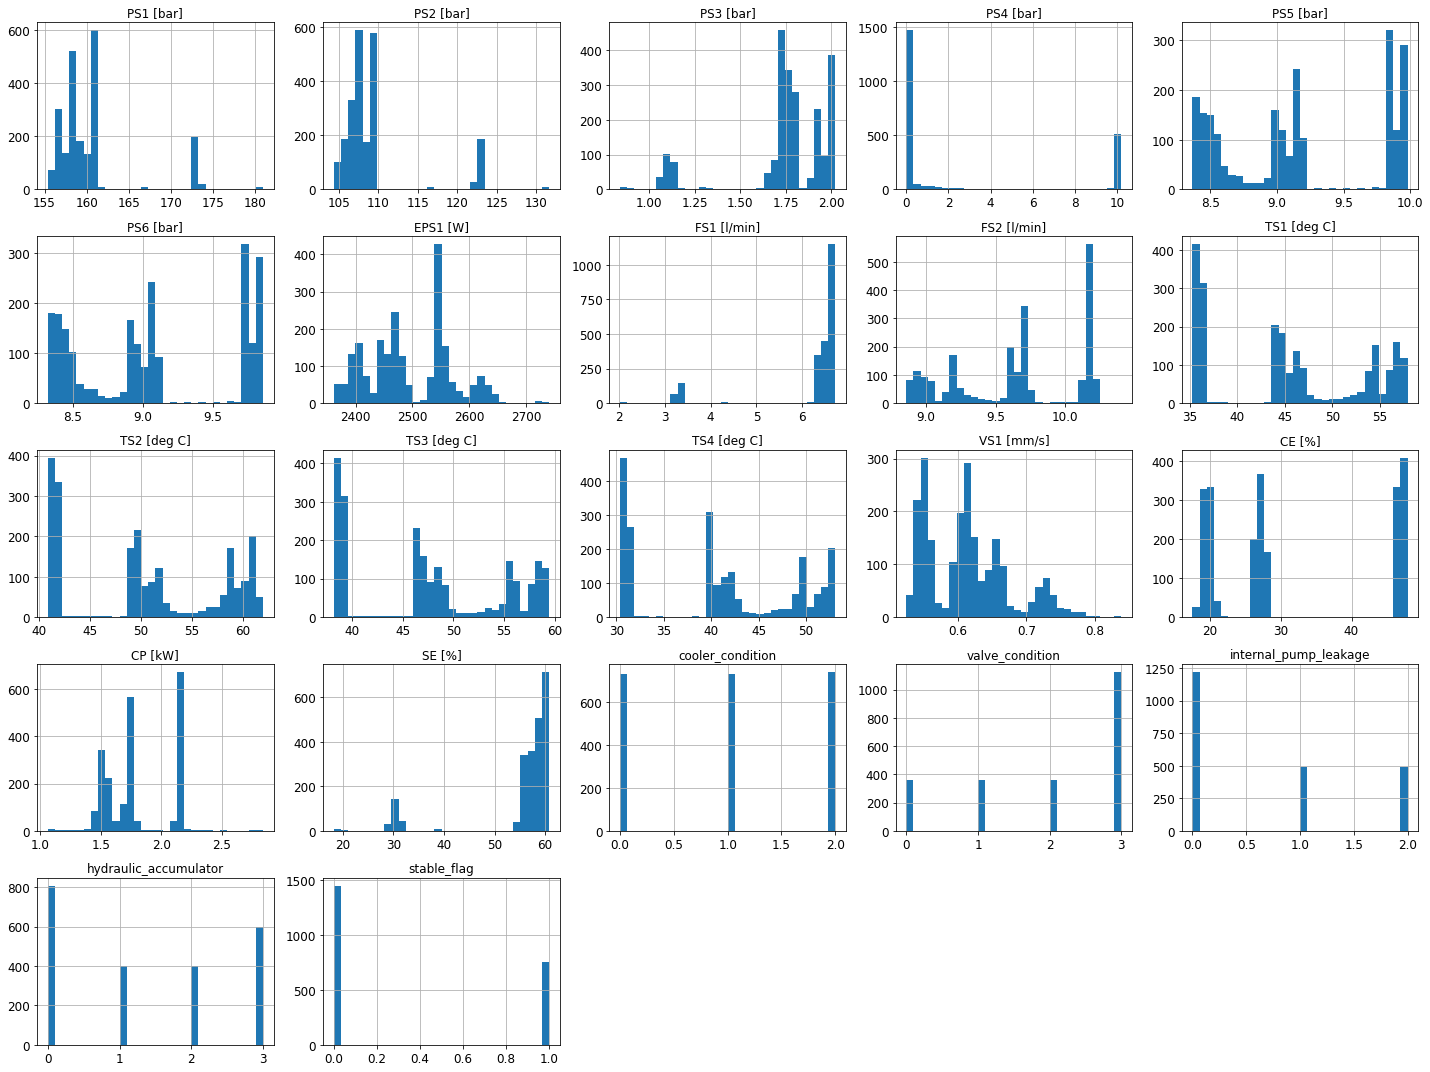

In [89]:
df.hist(bins=30, figsize=(20,15))

save_fig("dataset_histogram")

I am not able to see any useful information from the histograms, other that the count of the variuos targets are skewed. This will be adressed later.

Saving figure dataset_ext_histogram


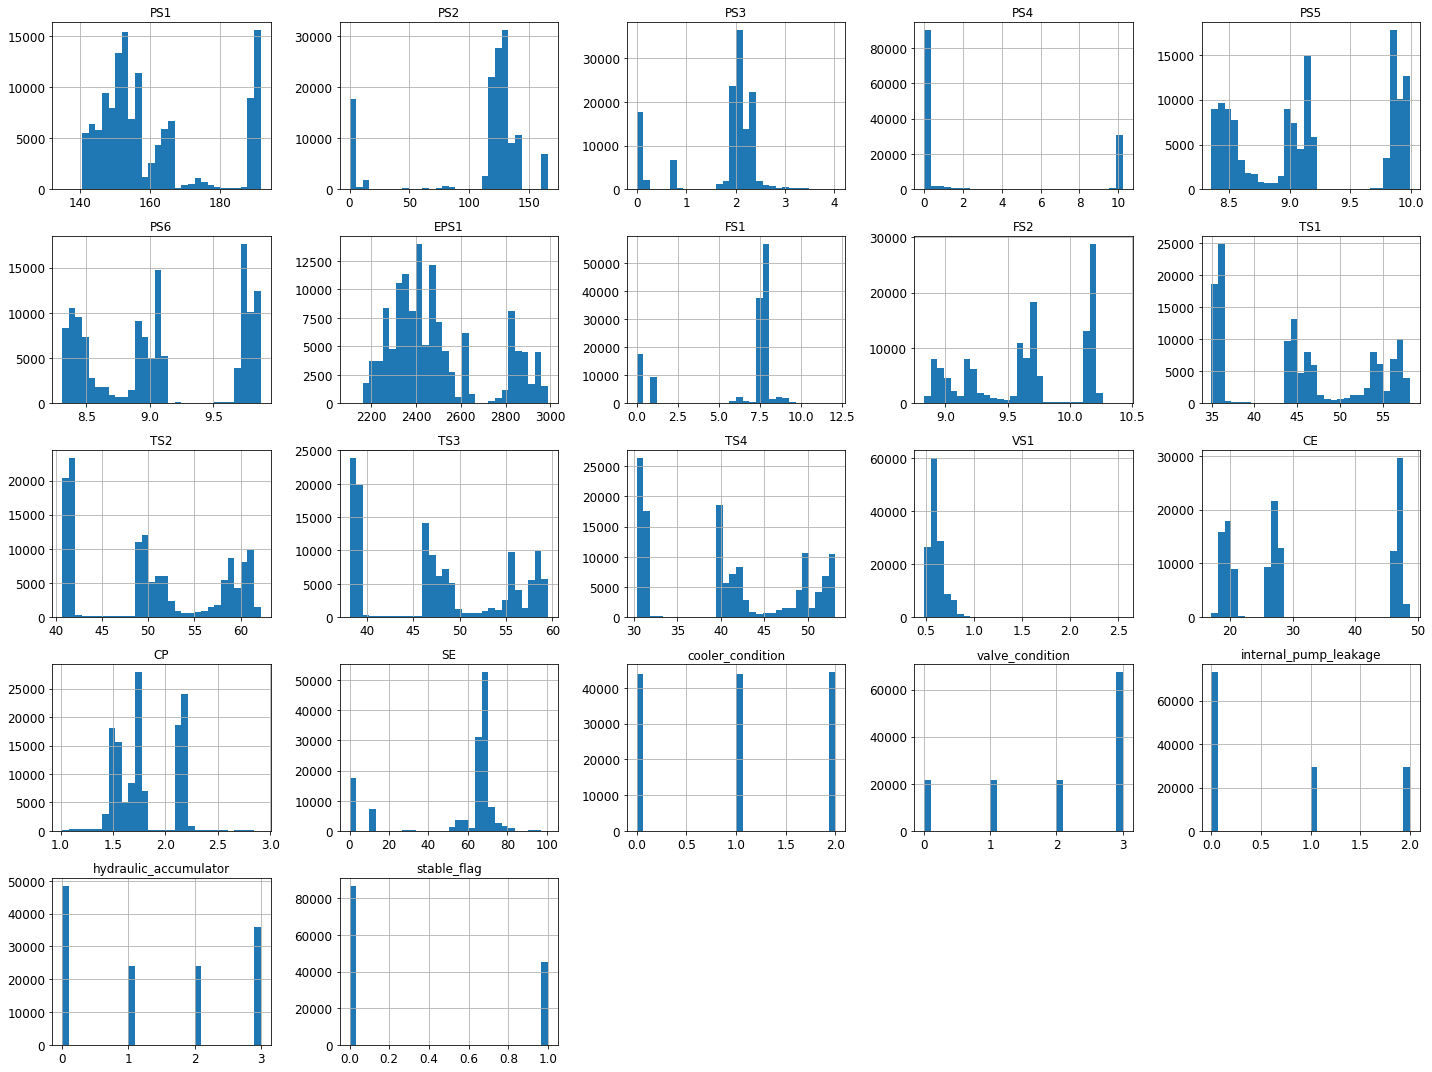

In [90]:
df_ext.hist(bins=30, figsize=(20,15))

save_fig("dataset_ext_histogram")

## Split the data

In [91]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [92]:
train_set_ext, test_set_ext = train_test_split(df_ext, test_size=0.2, random_state=42)

# Explore the data

In [93]:
# create a copy of the training set
data = train_set.copy()

In [94]:
data_ext = train_set_ext.copy()

## Looking for correlations

### Averaged dataset

In [95]:
corr_matrix = data.corr()

In [96]:
corr_matrix

,PS1 [bar],PS2 [bar],PS3 [bar],PS4 [bar],PS5 [bar],PS6 [bar],EPS1 [W],FS1 [l/min],FS2 [l/min],TS1 [deg C],...,TS4 [deg C],VS1 [mm/s],CE [%],CP [kW],SE [%],cooler_condition,valve_condition,internal_pump_leakage,hydraulic_accumulator,stable_flag
PS1 [bar],1.000000,0.995263,-0.724123,0.042283,-0.133295,-0.131885,0.830510,-0.925422,-0.234491,0.185992,...,0.180349,0.450512,-0.050698,-0.073645,-0.945506,-0.122522,-0.155035,0.312311,-0.177209,-0.233312
PS2 [bar],0.995263,1.000000,-0.772330,-0.022161,-0.209159,-0.207763,0.786586,-0.948112,-0.306721,0.260556,...,0.255319,0.511863,-0.126603,-0.146620,-0.959867,-0.197772,-0.098882,0.311539,-0.160667,-0.208041
PS3 [bar],-0.724123,-0.772330,1.000000,0.485366,0.756100,0.755175,-0.272832,0.922475,0.801281,-0.778110,...,-0.777763,-0.896501,0.696916,0.681020,0.885770,0.723833,0.147617,-0.354283,-0.007813,0.231774
PS4 [bar],0.042283,-0.022161,0.485366,1.000000,0.746682,0.747033,0.456742,0.200957,0.687357,-0.707506,...,-0.719583,-0.659604,0.818508,0.761048,0.128470,0.732309,-0.158190,0.143439,0.022547,-0.246610
PS5 [bar],-0.133295,-0.209159,0.756100,0.746682,1.000000,0.999993,0.413611,0.465198,0.979011,-0.992489,...,-0.995041,-0.897940,0.973089,0.937159,0.381852,0.974076,-0.001327,-0.015274,-0.188891,0.011952
PS6 [bar],-0.131885,-0.207763,0.755175,0.747033,0.999993,1.000000,0.414825,0.463921,0.978642,-0.992291,...,-0.994864,-0.897551,0.973341,0.937336,0.380525,0.974221,-0.001411,-0.014918,-0.189857,0.011796
EPS1 [W],0.830510,0.786586,-0.272832,0.456742,0.413611,0.414825,1.000000,-0.609012,0.317271,-0.365108,...,-0.370781,-0.069838,0.470721,0.428874,-0.678489,0.408439,-0.181534,0.427126,-0.206167,-0.271456
FS1 [l/min],-0.925422,-0.948112,0.922475,0.200957,0.465198,0.463921,-0.609012,1.000000,0.551817,-0.510801,...,-0.506138,-0.715772,0.378659,0.385330,0.994651,0.442995,0.179791,-0.419505,0.079536,0.284467
FS2 [l/min],-0.234491,-0.306721,0.801281,0.687357,0.979011,0.978642,0.317271,0.551817,1.000000,-0.994567,...,-0.991290,-0.922306,0.916210,0.874730,0.472928,0.944966,0.018574,-0.035800,-0.120763,0.050238
TS1 [deg C],0.185992,0.260556,-0.778110,-0.707506,-0.992489,-0.992291,-0.365108,-0.510801,-0.994567,1.000000,...,0.999229,0.913358,-0.943891,-0.910386,-0.428985,-0.969169,-0.002539,0.019025,0.173757,-0.020580


I am not able to find anything usefult in the correlation matrix either.

In [97]:
corr_matrix["valve_condition"].sort_values(ascending=False)

valve_condition          1.000000
stable_flag              0.606863
SE [%]                   0.221196
FS1 [l/min]              0.179791
PS3 [bar]                0.147617
FS2 [l/min]              0.018574
TS2 [deg C]              0.004160
TS4 [deg C]             -0.000725
PS5 [bar]               -0.001327
PS6 [bar]               -0.001411
TS1 [deg C]             -0.002539
TS3 [deg C]             -0.003510
CP [kW]                 -0.015995
cooler_condition        -0.017304
CE [%]                  -0.022471
hydraulic_accumulator   -0.090243
VS1 [mm/s]              -0.092931
PS2 [bar]               -0.098882
PS1 [bar]               -0.155035
PS4 [bar]               -0.158190
EPS1 [W]                -0.181534
internal_pump_leakage   -0.325058
Name: valve_condition, dtype: float64

### Extended dataset

In [98]:
corr_matrix_ext = data_ext.corr()

In [99]:
corr_matrix_ext

,PS1,PS2,PS3,PS4,PS5,PS6,EPS1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,cooler_condition,valve_condition,internal_pump_leakage,hydraulic_accumulator,stable_flag
PS1,1.000000,-0.612650,-0.823958,0.010486,-0.035881,-0.035378,0.973924,-0.894948,-0.064413,0.050971,...,0.050324,0.499210,-0.013211,-0.020859,-0.881750,-0.034395,-0.045020,0.092508,-0.052436,-0.066896
PS2,-0.612650,1.000000,0.772088,-0.002995,-0.019763,-0.019539,-0.579083,0.734605,-0.029314,0.035848,...,0.026793,-0.250216,-0.014545,-0.017804,0.682196,-0.019385,-0.008789,0.033029,-0.017183,-0.022118
PS3,-0.823958,0.772088,1.000000,0.148810,0.231299,0.230981,-0.723769,0.974752,0.244637,-0.233964,...,-0.237438,-0.491436,0.212664,0.206132,0.899850,0.223030,0.050890,-0.110901,-0.008015,0.072966
PS4,0.010486,-0.002995,0.148810,1.000000,0.740369,0.740656,0.153260,0.069138,0.684983,-0.703016,...,-0.714326,-0.490499,0.810050,0.746468,0.044921,0.726019,-0.145356,0.153665,0.007832,-0.245098
PS5,-0.035881,-0.019763,0.231299,0.740369,1.000000,0.999986,0.144107,0.158539,0.979602,-0.992102,...,-0.994939,-0.672555,0.973544,0.933869,0.132199,0.976034,0.018959,-0.018392,-0.213934,0.021065
PS6,-0.035378,-0.019539,0.230981,0.740656,0.999986,1.000000,0.144585,0.158081,0.979238,-0.991887,...,-0.994750,-0.672264,0.973759,0.934012,0.131750,0.976148,0.018913,-0.018076,-0.214920,0.020965
EPS1,0.973924,-0.579083,-0.723769,0.153260,0.144107,0.144585,1.000000,-0.819573,0.112729,-0.128866,...,-0.129311,0.387544,0.162231,0.145572,-0.843368,0.141582,-0.058788,0.145363,-0.075577,-0.089426
FS1,-0.894948,0.734605,0.974752,0.069138,0.158539,0.158081,-0.819573,1.000000,0.187655,-0.169180,...,-0.171640,-0.509249,0.128124,0.129510,0.941974,0.151856,0.065746,-0.146844,0.024469,0.098994
FS2,-0.064413,-0.029314,0.244637,0.684983,0.979602,0.979238,0.112729,0.187655,1.000000,-0.993911,...,-0.991168,-0.690342,0.918795,0.873896,0.163287,0.949049,0.036647,-0.036615,-0.146585,0.055259
TS1,0.050971,0.035848,-0.233964,-0.703016,-0.992102,-0.991887,-0.128866,-0.169180,-0.993911,1.000000,...,0.998957,0.677792,-0.945577,-0.909402,-0.140717,-0.971836,-0.022417,0.021576,0.199034,-0.028485


In [100]:
corr_matrix_ext["valve_condition"].sort_values(ascending=False)

valve_condition          1.000000
stable_flag              0.614203
SE                       0.080671
FS1                      0.065746
PS3                      0.050890
FS2                      0.036647
PS5                      0.018959
PS6                      0.018913
CP                       0.007512
cooler_condition         0.003430
CE                      -0.002316
PS2                     -0.008789
TS2                     -0.015568
TS4                     -0.021139
TS1                     -0.022417
TS3                     -0.023185
PS1                     -0.045020
EPS1                    -0.058788
VS1                     -0.077689
hydraulic_accumulator   -0.099544
PS4                     -0.145356
internal_pump_leakage   -0.341953
Name: valve_condition, dtype: float64

# Classification models

The situation to be looked at first is to classify a problem with the cooler. Hence creating a multiclass classifier that predict one of the three cooler conditions possible.

## Cooler condition

### Averaged dataset

In [101]:
X_train = train_set.iloc[:, :17]
y_train = train_set.iloc[:, 17]    # cooler condition

X_test = test_set.iloc[:, :17]
y_test = test_set.iloc[:, 17]      # cooler condition

In [102]:
y_train.value_counts(normalize=True)

1.0    0.338435
2.0    0.332766
0.0    0.328798
Name: cooler_condition, dtype: float64

The value count of the different classes is not skewed for the cooler condition

In [103]:
# define a test variable
some_instance = np.asarray(X_train.iloc[0, :]).reshape(1, -1) # cooler condition = 1

y_train.iloc[0]

1.0

### Extended dataset

In [104]:
X_train_ext = train_set_ext.iloc[:, :17]
y_train_ext = train_set_ext.iloc[:, 17]

X_test_ext = test_set_ext.iloc[:, :17]
y_test_ext = test_set_ext.iloc[:, 17]

In [105]:
y_train_ext.value_counts(normalize=True)

2.0    0.336130
1.0    0.332492
0.0    0.331378
Name: cooler_condition, dtype: float64

In [106]:
# define a test variable
some_instance_ext = np.asarray(X_train_ext.iloc[0, :]).reshape(1, -1) # cooler condition = 1

y_train.iloc[0]

1.0

### Support vector machine (averaged dataset)

In [107]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict(some_instance)

array([1.])

Correct

In [108]:
some_instance_scores = svm_clf.decision_function(some_instance)
some_instance_scores

array([[ 0.85722941,  2.21480757, -0.17176597]])

The classifier is fairly confident that the correct class is 1

In [109]:
svm_clf.classes_

array([0., 1., 2.])

The classes seem correct

#### Cross validation

In [110]:
from sklearn.model_selection import cross_val_score

cross_val_score(svm_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.67176871, 0.67006803, 0.67006803])

Cross validation reveals a rather poor result. A random classifier would get 33% accuracy.

In [111]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(svm_clf, X_train, y_train, cv=3)

#### Confusion matrix

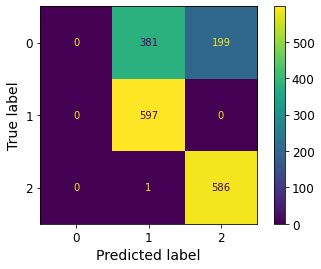

In [112]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

conf_mx = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(conf_mx).plot()

Confusion matrix reveals that the classifier necer predicts the 0-class. Let's try scaling the inputs.

#### Scaled, cross-validation

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

cross_val_score(svm_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([1.        , 0.99489796, 1.        ])

A huge performance boost. Also alarmingly high accuracy, overfitting?

#### Scaled, confusion-matrix

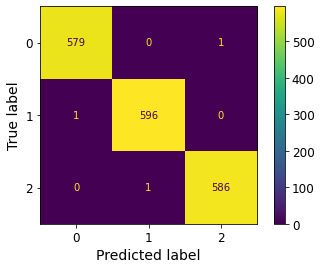

In [114]:
y_train_pred = cross_val_predict(svm_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(conf_mx).plot()

Confusion matrix visualize the almost perfect accuracy.

In [115]:
from sklearn.metrics import precision_score

precision_score(y_train, y_train_pred, average="weighted")

0.9982993197278912

99.8% of the training set is classified correctly

### Support Vector Machine (extended dataset)

#### Cross validation

#### Confusion matrix

An ok result. Trying with scaled dataset.

#### Scaling

#### Scaled, cross validation

#### Scaled, confusion matrix

The extended dataset does not seem to have a large impact on performance. Averaged dataset will be used.
Scaled input values will also be used as a standard.

### K Neighbors

In [116]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train)
knn_clf.predict(some_instance)

array([0.])

Wrong, should be 1

#### Cross validation

In [117]:
cross_val_score(knn_clf, X_train_scaled, y_train, cv=3)

array([1.        , 0.99489796, 1.        ])

K Neighbors also have a simular result as the SVM, almost a perfect score

#### Confusion matrix

In [118]:
y_train_pred = cross_val_predict(knn_clf, X_train_scaled, y_train, cv=3)

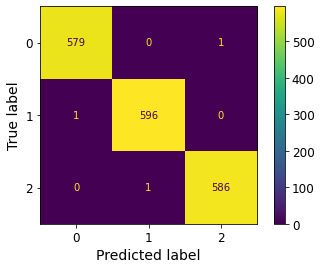

In [119]:
conf_mx = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(conf_mx).plot()

The K Neighbors classifier also seem to make the exact same (3) mistakes as the SVM classifier

### K Neighbors (extended dataset)

Similar results as with the averaged dataset

### Random forest

In [120]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train_scaled, y_train)
rnd_clf.predict(some_instance)

array([2.])

Wrong, should be 1

#### Cross validation

In [121]:
cross_val_score(rnd_clf, X_train_scaled, y_train, cv=3)

array([1.        , 0.99489796, 1.        ])

#### Confusion matrix

In [122]:
y_train_pred = cross_val_predict(rnd_clf, X_train_scaled, y_train, cv=3)

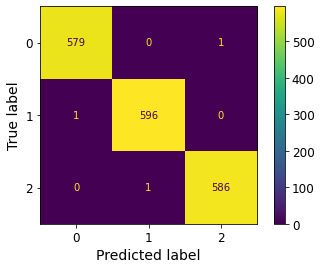

In [123]:
conf_mx = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(conf_mx).plot()

## Valve condition

In [124]:
y_train = train_set.iloc[:, 18]    # valve condition
y_test = test_set.iloc[:, 18]      # valve condition

In [125]:
y_train.value_counts(normalize=True)

3.0    0.520975
1.0    0.166100
2.0    0.158730
0.0    0.154195
Name: valve_condition, dtype: float64

In [126]:
y_train.iloc[0] # valve condition = 2 for some_instance

2.0

### Support Vector Machine

In [127]:
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)
svm_clf.predict(some_instance)

array([3.])

Wrong, should be 2

In [128]:
svm_clf.decision_function(some_instance)

array([[ 1.91691905,  0.85920089, -0.16988385,  3.22589825]])

In [129]:
svm_clf.classes_

array([0., 1., 2., 3.])

#### Cross validation

In [130]:
cross_val_score(svm_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.53401361, 0.52040816, 0.52210884])

Since 52% of the instances are class "3", this is barely better than a random classifier

#### Confusiuon matrix

In [131]:
y_train_pred = cross_val_predict(svm_clf, X_train_scaled, y_train, cv=3)

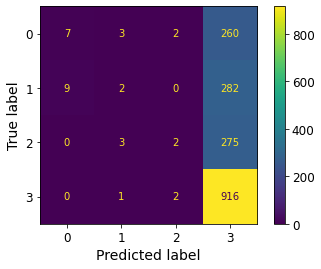

In [132]:
conf_mx = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(conf_mx).plot()

Confusion matrix confirms that classifier almost always guesses class "3"

### Upsample minority

In [133]:
# separate minority and majority classes
class0 = train_set[train_set.valve_condition==0]
class1 = train_set[train_set.valve_condition==1]
class2 = train_set[train_set.valve_condition==2]
class3 = train_set[train_set.valve_condition==3]

In [134]:
from sklearn.utils import resample

class0_upsampled = resample(class0, replace=True, n_samples=len(class3), random_state=42)
class1_upsampled = resample(class1, replace=True, n_samples=len(class3), random_state=42)
class2_upsampled = resample(class2, replace=True, n_samples=len(class3), random_state=42)

In [135]:
upsampled = pd.concat([class0_upsampled, class1_upsampled, class2_upsampled, class3])

In [136]:
upsampled.valve_condition.value_counts()

0.0    919
1.0    919
2.0    919
3.0    919
Name: valve_condition, dtype: int64

Now that the training set is upsampled, let us try again

In [137]:
X_train_up = upsampled.iloc[:, :17]
y_train_up = upsampled.iloc[:, 18]    # valve condition

In [138]:
X_train_up_scaled = scaler.fit_transform(X_train_up)

### Support vector machine, upsampled

In [139]:
svm_clf.fit(X_train_up_scaled, y_train_up)
svm_clf.predict(some_instance)

array([3.])

Wrong, should be 2

#### Cross validation

In [140]:
cross_val_score(svm_clf, X_train_up_scaled, y_train_up, cv=3, scoring="accuracy")

array([0.41761827, 0.45714286, 0.41714286])

That was worse than the random classifier...

#### Confusion matrix

In [141]:
y_train_up_pred = cross_val_predict(svm_clf, X_train_up_scaled, y_train_up, cv=3)

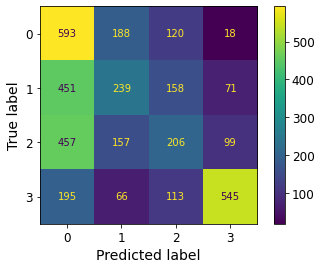

In [142]:
conf_mx = confusion_matrix(y_train_up, y_train_up_pred)
ConfusionMatrixDisplay(conf_mx).plot()

Let us try downsampling instead

### Downsampling

In [143]:
class3_downsampled = resample(class3, replace=True, n_samples=len(class0), random_state=42)

In [144]:
downsampled = pd.concat([class0, class1, class2, class3_downsampled])

In [145]:
downsampled.valve_condition.value_counts()

1.0    293
2.0    280
0.0    272
3.0    272
Name: valve_condition, dtype: int64

In [146]:
X_train_down = downsampled.iloc[:, :17]
y_train_down = downsampled.iloc[:, 18]    # valve condition

In [147]:
X_train_down_scaled = scaler.fit_transform(X_train_down)

### Support vector machine, downsampled

In [148]:
svm_clf.fit(X_train_down_scaled, y_train_down)
svm_clf.predict(some_instance)

array([0.])

Wrong, should be 2

#### Cross validation

In [149]:
cross_val_score(svm_clf, X_train_down_scaled, y_train_down, cv=3, scoring="accuracy")

array([0.35120643, 0.36827957, 0.43010753])

Even worse...

#### Confusion matrix

In [150]:
y_train_down_pred = cross_val_predict(svm_clf, X_train_down_scaled, y_train_down, cv=3)

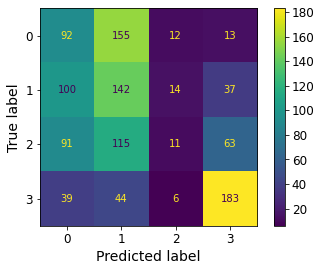

In [151]:
conf_mx = confusion_matrix(y_train_down, y_train_down_pred)
ConfusionMatrixDisplay(conf_mx).plot()

Not good at all. Let's try a different classifier.

### Random forest

In [152]:
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train_scaled, y_train)
rnd_clf.predict(some_instance)

array([3.])

Wrong, should be 2

#### Cross validation

In [153]:
cross_val_score(rnd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.96258503, 0.95408163, 0.96768707])

#### Confusion matrix

In [154]:
y_train_pred = cross_val_predict(rnd_clf, X_train_scaled, y_train, cv=3)

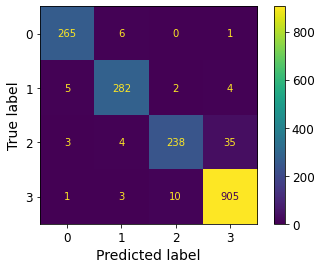

In [155]:
conf_mx = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(conf_mx).plot()

#### Upsampled, cross validation

In [156]:
cross_val_score(rnd_clf, X_train_up_scaled, y_train_up, cv=3, scoring="accuracy")

array([0.98613377, 0.99020408, 0.98857143])

#### Upsampled, confusion matrix

In [157]:
y_train_up_pred = cross_val_predict(rnd_clf, X_train_up_scaled, y_train_up, cv=3)

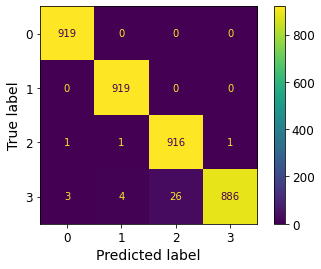

In [158]:
conf_mx = confusion_matrix(y_train_up, y_train_up_pred)
ConfusionMatrixDisplay(conf_mx).plot()

#### Downsampled, cross validation

In [159]:
cross_val_score(rnd_clf, X_train_down_scaled, y_train_down, cv=3, scoring="accuracy")

array([0.9383378 , 0.92473118, 0.95430108])

Worse. Upsampled seem to give the best results.

### K Neighbors

In [160]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_up_scaled, y_train_up)
knn_clf.predict(some_instance)

array([0.])

Wrong, should be 2

#### Cross validation

In [161]:
cross_val_score(knn_clf, X_train_up_scaled, y_train_up, cv=3)

array([0.86378467, 0.88979592, 0.87836735])

Not as good as Random Forest

In [162]:
feature_importances = rnd_clf.feature_importances_

In [163]:
for i in sorted(zip(feature_importances, list(X_train)), reverse=True): print(i)

(0.1887670475152641, 'PS2 [bar]')
(0.1539085930907505, 'SE [%]')
(0.12804515432282734, 'PS1 [bar]')
(0.10104902030933863, 'FS1 [l/min]')
(0.042963475009864985, 'TS1 [deg C]')
(0.04209532988981137, 'TS2 [deg C]')
(0.04023038013465904, 'TS4 [deg C]')
(0.040120422783259294, 'TS3 [deg C]')
(0.03991769260393159, 'PS6 [bar]')
(0.03833046236722173, 'PS5 [bar]')
(0.03831594567349571, 'PS3 [bar]')
(0.0367482383023114, 'EPS1 [W]')
(0.02714524086092834, 'VS1 [mm/s]')
(0.025488173157863395, 'FS2 [l/min]')
(0.02136886911666119, 'CP [kW]')
(0.02060729927887532, 'CE [%]')
(0.014898655582936085, 'PS4 [bar]')


# Fine-tune the system

In [164]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [10, 100, 1000], "max_features": ["auto", "log2"]},
    {"bootstrap": [False], "n_estimators": [10, 100, 1000], "max_features": ["auto", "log2"]}
]

rnd_clf = RandomForestClassifier()

grid_search = GridSearchCV(rnd_clf, param_grid, cv=3, scoring="neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train_up_scaled, y_train_up)

grid_search.best_params_

{'bootstrap': False, 'max_features': 'log2', 'n_estimators': 100}

In [165]:
rnd_clf = grid_search.best_estimator_

rnd_clf.fit(X_train_up_scaled, y_train_up)

cross_val_score(rnd_clf, X_train_up_scaled, y_train_up, cv=3, scoring="accuracy")

array([0.99347471, 0.99183673, 0.99102041])

## Evaluate on test set

In [166]:
scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Best model

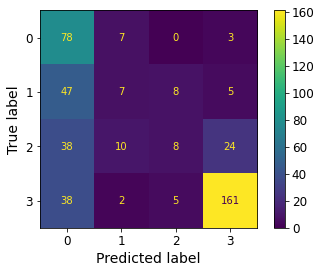

In [167]:
y_test_pred = rnd_clf.predict(X_test_scaled)

conf_mx = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_mx).plot()

In [168]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.5759637188208617

### Best model fitted on not upsampled test set

0.9795918367346939

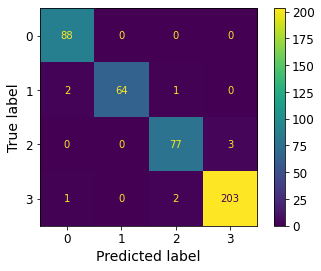

In [169]:
rnd_clf = grid_search.best_estimator_
rnd_clf.fit(X_train_scaled, y_train)

y_test_pred = rnd_clf.predict(X_test_scaled)

conf_mx = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_mx).plot()

accuracy_score(y_test, y_test_pred)

### Default model fitted on not upsampled test set

0.9727891156462585

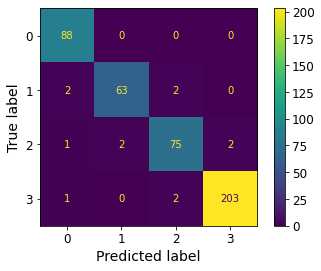

In [170]:
rnd_clf = RandomForestClassifier()
rnd_clf.fit(X_train_scaled, y_train)

y_test_pred = rnd_clf.predict(X_test_scaled)

conf_mx = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_mx).plot()

accuracy_score(y_test, y_test_pred)

0.9020408163265307

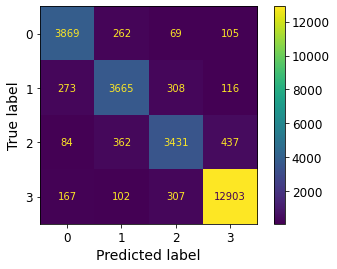

In [171]:
X_train_ext_scaled = scaler.fit_transform(X_train_ext)
X_test_ext_scaled = scaler.transform(X_test_ext)

y_train_ext = train_set_ext.iloc[:, 18]
y_test_ext = test_set_ext.iloc[:, 18]

rnd_clf_ext = RandomForestClassifier()
rnd_clf_ext.fit(X_train_ext_scaled, y_train_ext)

y_test_ext_pred = rnd_clf_ext.predict(X_test_ext_scaled)

conf_mx = confusion_matrix(y_test_ext, y_test_ext_pred)
ConfusionMatrixDisplay(conf_mx).plot()

accuracy_score(y_test_ext, y_test_ext_pred)

0.5249055177626606

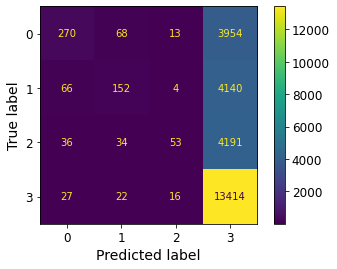

In [172]:
svm_clf_ext = SVC()
svm_clf_ext.fit(X_train_ext_scaled, y_train_ext)

y_test_ext_pred = svm_clf_ext.predict(X_test_ext_scaled)

conf_mx = confusion_matrix(y_test_ext, y_test_ext_pred)
ConfusionMatrixDisplay(conf_mx).plot()

accuracy_score(y_test_ext, y_test_ext_pred)

# Neural network

## Sequential model with many layers and neurons

In [292]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(4, activation="softmax")
])

In [293]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 100)               1800      
                                                                 
 dense_57 (Dense)            (None, 100)               10100     
                                                                 
 dense_58 (Dense)            (None, 100)               10100     
                                                                 
 dense_59 (Dense)            (None, 100)               10100     
                                                                 
 dense_60 (Dense)            (None, 4)                 404       
                                                                 
Total params: 32,504
Trainable params: 32,504
Non-trainable params: 0
_________________________________________________________________


In [294]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [295]:
class_weight = {0: 2,
                1: 2,
                2: 2,
                3: 1}

early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=1000,
                    validation_split=0.1,
                    class_weight=class_weight,
                    callbacks=[early_stopping_cb])

Epoch 1/1000
50/50 [==============================] - 0s 2ms/step - loss: 2.0276 - accuracy: 0.4883 - val_loss: 1.2773 - val_accuracy: 0.5141
Epoch 2/1000
50/50 [==============================] - 0s 755us/step - loss: 1.9815 - accuracy: 0.5135 - val_loss: 1.2173 - val_accuracy: 0.5198
Epoch 3/1000
50/50 [==============================] - 0s 735us/step - loss: 1.9567 - accuracy: 0.5148 - val_loss: 1.2022 - val_accuracy: 0.5141
Epoch 4/1000
50/50 [==============================] - 0s 755us/step - loss: 1.9348 - accuracy: 0.5154 - val_loss: 1.1852 - val_accuracy: 0.5198
Epoch 5/1000
50/50 [==============================] - 0s 755us/step - loss: 1.9149 - accuracy: 0.5148 - val_loss: 1.1675 - val_accuracy: 0.5141
Epoch 6/1000
50/50 [==============================] - 0s 755us/step - loss: 1.8978 - accuracy: 0.5142 - val_loss: 1.1450 - val_accuracy: 0.5311
Epoch 7/1000
50/50 [==============================] - 0s 755us/step - loss: 1.8799 - accuracy: 0.5243 - val_loss: 1.1360 - val_accuracy: 0

50/50 [==============================] - 0s 755us/step - loss: 1.2257 - accuracy: 0.6982 - val_loss: 1.0413 - val_accuracy: 0.5198
Epoch 58/1000
50/50 [==============================] - 0s 776us/step - loss: 1.2605 - accuracy: 0.6843 - val_loss: 0.6200 - val_accuracy: 0.7175
Epoch 59/1000
50/50 [==============================] - 0s 755us/step - loss: 1.1715 - accuracy: 0.7057 - val_loss: 0.6154 - val_accuracy: 0.7175
Epoch 60/1000
50/50 [==============================] - 0s 776us/step - loss: 1.1675 - accuracy: 0.7114 - val_loss: 0.5851 - val_accuracy: 0.7175
Epoch 61/1000
50/50 [==============================] - 0s 735us/step - loss: 1.1857 - accuracy: 0.7007 - val_loss: 1.1995 - val_accuracy: 0.5480
Epoch 62/1000
50/50 [==============================] - 0s 735us/step - loss: 1.1806 - accuracy: 0.7139 - val_loss: 0.6558 - val_accuracy: 0.6667
Epoch 63/1000
50/50 [==============================] - 0s 735us/step - loss: 1.1509 - accuracy: 0.7240 - val_loss: 0.7116 - val_accuracy: 0.7006

50/50 [==============================] - 0s 735us/step - loss: 0.7946 - accuracy: 0.7839 - val_loss: 0.3335 - val_accuracy: 0.8701
Epoch 114/1000
50/50 [==============================] - 0s 755us/step - loss: 0.7511 - accuracy: 0.8229 - val_loss: 0.4262 - val_accuracy: 0.7571
Epoch 115/1000
50/50 [==============================] - 0s 755us/step - loss: 0.7754 - accuracy: 0.7870 - val_loss: 0.3437 - val_accuracy: 0.8192
Epoch 116/1000
50/50 [==============================] - 0s 735us/step - loss: 0.7280 - accuracy: 0.8179 - val_loss: 0.3931 - val_accuracy: 0.9040
Epoch 117/1000
50/50 [==============================] - 0s 735us/step - loss: 0.8408 - accuracy: 0.7870 - val_loss: 0.3477 - val_accuracy: 0.8814
Epoch 118/1000
50/50 [==============================] - 0s 755us/step - loss: 0.7053 - accuracy: 0.8097 - val_loss: 0.6569 - val_accuracy: 0.6893
Epoch 119/1000
50/50 [==============================] - 0s 755us/step - loss: 0.8263 - accuracy: 0.7681 - val_loss: 0.9728 - val_accuracy: 

50/50 [==============================] - 0s 857us/step - loss: 0.5623 - accuracy: 0.8513 - val_loss: 0.2197 - val_accuracy: 0.8983
Epoch 170/1000
50/50 [==============================] - 0s 735us/step - loss: 0.5933 - accuracy: 0.8570 - val_loss: 0.5263 - val_accuracy: 0.7458
Epoch 171/1000
50/50 [==============================] - 0s 776us/step - loss: 0.8581 - accuracy: 0.8078 - val_loss: 0.2081 - val_accuracy: 0.9435
Epoch 172/1000
50/50 [==============================] - 0s 776us/step - loss: 0.5864 - accuracy: 0.8425 - val_loss: 0.4472 - val_accuracy: 0.7514
Epoch 173/1000
50/50 [==============================] - 0s 735us/step - loss: 0.5901 - accuracy: 0.8324 - val_loss: 0.2917 - val_accuracy: 0.8249
Epoch 174/1000
50/50 [==============================] - 0s 735us/step - loss: 0.6210 - accuracy: 0.8582 - val_loss: 0.3410 - val_accuracy: 0.7853
Epoch 175/1000
50/50 [==============================] - 0s 755us/step - loss: 0.5607 - accuracy: 0.8532 - val_loss: 0.1864 - val_accuracy: 

50/50 [==============================] - 0s 776us/step - loss: 0.5080 - accuracy: 0.8715 - val_loss: 0.1148 - val_accuracy: 0.9887
Epoch 226/1000
50/50 [==============================] - 0s 735us/step - loss: 0.5216 - accuracy: 0.8576 - val_loss: 0.1694 - val_accuracy: 0.9548
Epoch 227/1000
50/50 [==============================] - 0s 735us/step - loss: 0.5441 - accuracy: 0.8828 - val_loss: 0.1708 - val_accuracy: 0.9492
Epoch 228/1000
50/50 [==============================] - 0s 735us/step - loss: 0.5425 - accuracy: 0.8607 - val_loss: 0.7926 - val_accuracy: 0.7006
Epoch 229/1000
50/50 [==============================] - 0s 755us/step - loss: 0.6876 - accuracy: 0.8110 - val_loss: 0.2404 - val_accuracy: 0.9266
Epoch 230/1000
50/50 [==============================] - 0s 735us/step - loss: 0.4905 - accuracy: 0.8708 - val_loss: 0.5058 - val_accuracy: 0.7458
Epoch 231/1000
50/50 [==============================] - 0s 735us/step - loss: 0.4909 - accuracy: 0.8828 - val_loss: 0.1913 - val_accuracy: 

50/50 [==============================] - 0s 755us/step - loss: 0.4274 - accuracy: 0.8910 - val_loss: 0.2186 - val_accuracy: 0.8814
Epoch 282/1000
50/50 [==============================] - 0s 755us/step - loss: 0.4699 - accuracy: 0.8847 - val_loss: 0.1355 - val_accuracy: 0.9435
Epoch 283/1000
50/50 [==============================] - 0s 755us/step - loss: 0.4500 - accuracy: 0.8878 - val_loss: 0.2446 - val_accuracy: 0.8701
Epoch 284/1000
50/50 [==============================] - 0s 755us/step - loss: 0.3240 - accuracy: 0.9301 - val_loss: 0.1037 - val_accuracy: 0.9605
Epoch 285/1000
50/50 [==============================] - 0s 735us/step - loss: 0.5219 - accuracy: 0.8866 - val_loss: 0.1335 - val_accuracy: 0.9605
Epoch 286/1000
50/50 [==============================] - 0s 735us/step - loss: 0.2975 - accuracy: 0.9338 - val_loss: 0.2096 - val_accuracy: 0.8870
Epoch 287/1000
50/50 [==============================] - 0s 735us/step - loss: 0.4005 - accuracy: 0.9011 - val_loss: 0.6659 - val_accuracy: 

50/50 [==============================] - 0s 714us/step - loss: 0.6128 - accuracy: 0.8841 - val_loss: 0.4008 - val_accuracy: 0.7910
Epoch 338/1000
50/50 [==============================] - 0s 735us/step - loss: 0.2649 - accuracy: 0.9458 - val_loss: 0.1385 - val_accuracy: 0.9435
Epoch 339/1000
50/50 [==============================] - 0s 735us/step - loss: 0.3248 - accuracy: 0.9357 - val_loss: 0.0716 - val_accuracy: 0.9831
Epoch 340/1000
50/50 [==============================] - 0s 735us/step - loss: 0.3631 - accuracy: 0.9269 - val_loss: 0.4227 - val_accuracy: 0.8023
Epoch 341/1000
50/50 [==============================] - 0s 735us/step - loss: 0.4015 - accuracy: 0.9036 - val_loss: 0.1828 - val_accuracy: 0.9322
Epoch 342/1000
50/50 [==============================] - 0s 714us/step - loss: 0.3481 - accuracy: 0.9250 - val_loss: 0.0792 - val_accuracy: 0.9887
Epoch 343/1000
50/50 [==============================] - 0s 735us/step - loss: 0.3600 - accuracy: 0.9275 - val_loss: 0.1153 - val_accuracy: 

50/50 [==============================] - 0s 735us/step - loss: 0.1866 - accuracy: 0.9628 - val_loss: 0.0726 - val_accuracy: 0.9887
Epoch 394/1000
50/50 [==============================] - 0s 755us/step - loss: 0.3698 - accuracy: 0.9206 - val_loss: 0.1026 - val_accuracy: 0.9492
Epoch 395/1000
50/50 [==============================] - 0s 755us/step - loss: 0.1320 - accuracy: 0.9805 - val_loss: 0.0602 - val_accuracy: 0.9887
Epoch 396/1000
50/50 [==============================] - 0s 735us/step - loss: 0.2537 - accuracy: 0.9496 - val_loss: 0.0472 - val_accuracy: 0.9944
Epoch 397/1000
50/50 [==============================] - 0s 735us/step - loss: 0.3373 - accuracy: 0.9212 - val_loss: 0.0572 - val_accuracy: 0.9831
Epoch 398/1000
50/50 [==============================] - 0s 755us/step - loss: 0.3687 - accuracy: 0.9143 - val_loss: 0.1040 - val_accuracy: 0.9831
Epoch 399/1000
50/50 [==============================] - 0s 755us/step - loss: 0.3318 - accuracy: 0.9212 - val_loss: 0.0941 - val_accuracy: 

50/50 [==============================] - 0s 735us/step - loss: 0.2146 - accuracy: 0.9534 - val_loss: 0.0560 - val_accuracy: 0.9887
Epoch 450/1000
50/50 [==============================] - 0s 735us/step - loss: 0.2358 - accuracy: 0.9521 - val_loss: 0.0531 - val_accuracy: 0.9944
Epoch 451/1000
50/50 [==============================] - 0s 735us/step - loss: 0.0967 - accuracy: 0.9861 - val_loss: 0.0367 - val_accuracy: 1.0000
Epoch 452/1000
50/50 [==============================] - 0s 735us/step - loss: 0.4970 - accuracy: 0.9004 - val_loss: 0.4913 - val_accuracy: 0.7853
Epoch 453/1000
50/50 [==============================] - 0s 735us/step - loss: 0.3002 - accuracy: 0.9282 - val_loss: 0.0559 - val_accuracy: 1.0000
Epoch 454/1000
50/50 [==============================] - 0s 735us/step - loss: 0.1817 - accuracy: 0.9616 - val_loss: 0.0480 - val_accuracy: 0.9887
Epoch 455/1000
50/50 [==============================] - 0s 735us/step - loss: 0.0955 - accuracy: 0.9874 - val_loss: 0.1942 - val_accuracy: 

50/50 [==============================] - 0s 735us/step - loss: 0.1553 - accuracy: 0.9704 - val_loss: 0.0383 - val_accuracy: 1.0000
Epoch 506/1000
50/50 [==============================] - 0s 755us/step - loss: 0.1101 - accuracy: 0.9817 - val_loss: 1.3531 - val_accuracy: 0.6215
Epoch 507/1000
50/50 [==============================] - 0s 755us/step - loss: 0.1393 - accuracy: 0.9824 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 508/1000
50/50 [==============================] - 0s 735us/step - loss: 0.3831 - accuracy: 0.9130 - val_loss: 0.0506 - val_accuracy: 0.9944
Epoch 509/1000
50/50 [==============================] - 0s 735us/step - loss: 0.2184 - accuracy: 0.9546 - val_loss: 0.0512 - val_accuracy: 0.9774
Epoch 510/1000
50/50 [==============================] - 0s 755us/step - loss: 0.1436 - accuracy: 0.9761 - val_loss: 1.0530 - val_accuracy: 0.7119
Epoch 511/1000
50/50 [==============================] - 0s 755us/step - loss: 0.3797 - accuracy: 0.9118 - val_loss: 0.0554 - val_accuracy: 

(0.0, 1.0)

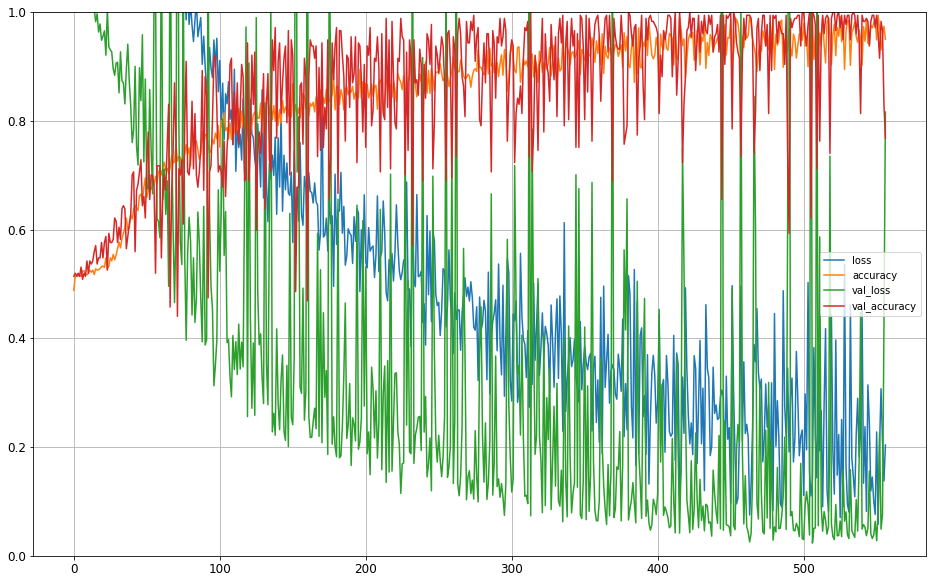

In [296]:
pd.DataFrame(history.history).plot(figsize=(16, 10))
plt.grid(True)
plt.legend(loc="center right")
plt.gca().set_ylim(0, 1)

In [297]:
model.evaluate(X_train_scaled, y_train)

56/56 [==============================] - 0s 400us/step - loss: 0.0312 - accuracy: 0.9960


[0.031226294115185738, 0.9960317611694336]

In [298]:
model.evaluate(X_test_scaled, y_test)

14/14 [==============================] - 0s 462us/step - loss: 0.0437 - accuracy: 0.9887


[0.043743789196014404, 0.9886621236801147]

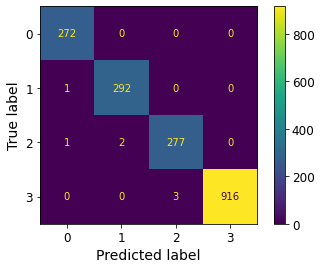

In [299]:
y_train_pred = np.argmax(model.predict(X_train_scaled), axis=-1)

conf_mx = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(conf_mx).plot()

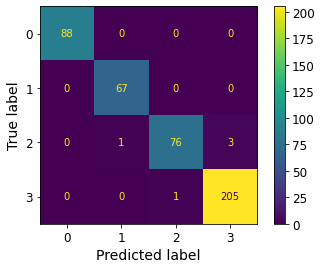

In [300]:
y_test_pred = np.argmax(model.predict(X_test_scaled), axis=-1)

conf_mx = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_mx).plot()

## Sequential model with one layer and fewer neurons

In [265]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(4, activation="softmax")
])

In [266]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 30)                540       
                                                                 
 dense_47 (Dense)            (None, 4)                 124       
                                                                 
Total params: 664
Trainable params: 664
Non-trainable params: 0
_________________________________________________________________


In [267]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [268]:
class_weight = {0: 2,
                1: 2,
                2: 2,
                3: 1}

early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=1000,
                    validation_split=0.1,
                    class_weight=class_weight,
                    callbacks=[early_stopping_cb])

Epoch 1/1000
50/50 [==============================] - 0s 2ms/step - loss: 2.1577 - accuracy: 0.3491 - val_loss: 1.3246 - val_accuracy: 0.3842
Epoch 2/1000
50/50 [==============================] - 0s 653us/step - loss: 2.0253 - accuracy: 0.4644 - val_loss: 1.2810 - val_accuracy: 0.5198
Epoch 3/1000
50/50 [==============================] - 0s 653us/step - loss: 2.0031 - accuracy: 0.5135 - val_loss: 1.2597 - val_accuracy: 0.5198
Epoch 4/1000
50/50 [==============================] - 0s 653us/step - loss: 1.9883 - accuracy: 0.5098 - val_loss: 1.2520 - val_accuracy: 0.5141
Epoch 5/1000
50/50 [==============================] - 0s 653us/step - loss: 1.9761 - accuracy: 0.5135 - val_loss: 1.2300 - val_accuracy: 0.5198
Epoch 6/1000
50/50 [==============================] - 0s 674us/step - loss: 1.9651 - accuracy: 0.5142 - val_loss: 1.2113 - val_accuracy: 0.5141
Epoch 7/1000
50/50 [==============================] - 0s 674us/step - loss: 1.9550 - accuracy: 0.5154 - val_loss: 1.2059 - val_accuracy: 0

50/50 [==============================] - 0s 796us/step - loss: 1.7274 - accuracy: 0.5476 - val_loss: 1.0245 - val_accuracy: 0.5311
Epoch 58/1000
50/50 [==============================] - 0s 674us/step - loss: 1.7245 - accuracy: 0.5520 - val_loss: 1.0168 - val_accuracy: 0.5311
Epoch 59/1000
50/50 [==============================] - 0s 653us/step - loss: 1.7222 - accuracy: 0.5488 - val_loss: 1.0300 - val_accuracy: 0.5254
Epoch 60/1000
50/50 [==============================] - 0s 653us/step - loss: 1.7201 - accuracy: 0.5495 - val_loss: 1.0232 - val_accuracy: 0.5424
Epoch 61/1000
50/50 [==============================] - 0s 653us/step - loss: 1.7157 - accuracy: 0.5532 - val_loss: 1.0185 - val_accuracy: 0.5254
Epoch 62/1000
50/50 [==============================] - 0s 653us/step - loss: 1.7133 - accuracy: 0.5520 - val_loss: 1.0187 - val_accuracy: 0.5254
Epoch 63/1000
50/50 [==============================] - 0s 653us/step - loss: 1.7117 - accuracy: 0.5514 - val_loss: 1.0128 - val_accuracy: 0.5367

50/50 [==============================] - 0s 653us/step - loss: 1.5565 - accuracy: 0.5848 - val_loss: 0.9152 - val_accuracy: 0.6158
Epoch 114/1000
50/50 [==============================] - 0s 653us/step - loss: 1.5531 - accuracy: 0.6018 - val_loss: 0.9173 - val_accuracy: 0.5650
Epoch 115/1000
50/50 [==============================] - 0s 674us/step - loss: 1.5486 - accuracy: 0.5936 - val_loss: 0.9104 - val_accuracy: 0.5819
Epoch 116/1000
50/50 [==============================] - 0s 633us/step - loss: 1.5458 - accuracy: 0.5873 - val_loss: 0.9183 - val_accuracy: 0.5932
Epoch 117/1000
50/50 [==============================] - 0s 633us/step - loss: 1.5406 - accuracy: 0.5942 - val_loss: 0.9105 - val_accuracy: 0.5537
Epoch 118/1000
50/50 [==============================] - 0s 653us/step - loss: 1.5339 - accuracy: 0.5955 - val_loss: 0.9153 - val_accuracy: 0.5819
Epoch 119/1000
50/50 [==============================] - 0s 653us/step - loss: 1.5312 - accuracy: 0.5999 - val_loss: 0.9007 - val_accuracy: 

50/50 [==============================] - 0s 653us/step - loss: 1.2913 - accuracy: 0.7026 - val_loss: 0.7457 - val_accuracy: 0.7006
Epoch 170/1000
50/50 [==============================] - 0s 653us/step - loss: 1.2856 - accuracy: 0.7045 - val_loss: 0.7674 - val_accuracy: 0.7401
Epoch 171/1000
50/50 [==============================] - 0s 653us/step - loss: 1.2805 - accuracy: 0.7234 - val_loss: 0.7545 - val_accuracy: 0.7401
Epoch 172/1000
50/50 [==============================] - 0s 633us/step - loss: 1.2819 - accuracy: 0.7013 - val_loss: 0.7559 - val_accuracy: 0.7062
Epoch 173/1000
50/50 [==============================] - 0s 633us/step - loss: 1.2731 - accuracy: 0.7139 - val_loss: 0.7467 - val_accuracy: 0.7401
Epoch 174/1000
50/50 [==============================] - 0s 653us/step - loss: 1.2634 - accuracy: 0.7177 - val_loss: 0.7480 - val_accuracy: 0.7458
Epoch 175/1000
50/50 [==============================] - 0s 653us/step - loss: 1.2560 - accuracy: 0.7284 - val_loss: 0.7578 - val_accuracy: 

50/50 [==============================] - 0s 653us/step - loss: 1.0322 - accuracy: 0.8179 - val_loss: 0.6384 - val_accuracy: 0.8023
Epoch 226/1000
50/50 [==============================] - 0s 633us/step - loss: 1.0323 - accuracy: 0.8040 - val_loss: 0.6074 - val_accuracy: 0.7966
Epoch 227/1000
50/50 [==============================] - 0s 653us/step - loss: 1.0287 - accuracy: 0.8173 - val_loss: 0.5996 - val_accuracy: 0.8531
Epoch 228/1000
50/50 [==============================] - 0s 653us/step - loss: 1.0239 - accuracy: 0.8141 - val_loss: 0.6025 - val_accuracy: 0.8192
Epoch 229/1000
50/50 [==============================] - 0s 653us/step - loss: 1.0233 - accuracy: 0.8040 - val_loss: 0.6006 - val_accuracy: 0.8644
Epoch 230/1000
50/50 [==============================] - 0s 653us/step - loss: 1.0185 - accuracy: 0.8154 - val_loss: 0.5955 - val_accuracy: 0.8701
Epoch 231/1000
50/50 [==============================] - 0s 653us/step - loss: 1.0095 - accuracy: 0.8210 - val_loss: 0.5976 - val_accuracy: 

50/50 [==============================] - 0s 653us/step - loss: 0.8561 - accuracy: 0.8614 - val_loss: 0.4940 - val_accuracy: 0.9040
Epoch 282/1000
50/50 [==============================] - 0s 653us/step - loss: 0.8485 - accuracy: 0.8601 - val_loss: 0.4832 - val_accuracy: 0.9040
Epoch 283/1000
50/50 [==============================] - 0s 653us/step - loss: 0.8495 - accuracy: 0.8759 - val_loss: 0.4900 - val_accuracy: 0.8983
Epoch 284/1000
50/50 [==============================] - 0s 653us/step - loss: 0.8411 - accuracy: 0.8601 - val_loss: 0.4986 - val_accuracy: 0.8983
Epoch 285/1000
50/50 [==============================] - 0s 653us/step - loss: 0.8410 - accuracy: 0.8696 - val_loss: 0.4955 - val_accuracy: 0.8870
Epoch 286/1000
50/50 [==============================] - 0s 653us/step - loss: 0.8380 - accuracy: 0.8765 - val_loss: 0.4957 - val_accuracy: 0.8870
Epoch 287/1000
50/50 [==============================] - 0s 674us/step - loss: 0.8386 - accuracy: 0.8652 - val_loss: 0.4704 - val_accuracy: 

50/50 [==============================] - 0s 653us/step - loss: 0.7167 - accuracy: 0.8979 - val_loss: 0.3975 - val_accuracy: 0.9322
Epoch 338/1000
50/50 [==============================] - 0s 653us/step - loss: 0.7230 - accuracy: 0.9061 - val_loss: 0.4208 - val_accuracy: 0.9040
Epoch 339/1000
50/50 [==============================] - 0s 653us/step - loss: 0.7135 - accuracy: 0.9036 - val_loss: 0.3995 - val_accuracy: 0.9209
Epoch 340/1000
50/50 [==============================] - 0s 653us/step - loss: 0.7112 - accuracy: 0.9149 - val_loss: 0.4286 - val_accuracy: 0.9040
Epoch 341/1000
50/50 [==============================] - 0s 653us/step - loss: 0.7143 - accuracy: 0.8910 - val_loss: 0.4349 - val_accuracy: 0.8983
Epoch 342/1000
50/50 [==============================] - 0s 653us/step - loss: 0.7069 - accuracy: 0.9149 - val_loss: 0.4353 - val_accuracy: 0.9040
Epoch 343/1000
50/50 [==============================] - 0s 653us/step - loss: 0.7059 - accuracy: 0.9030 - val_loss: 0.4311 - val_accuracy: 

50/50 [==============================] - 0s 653us/step - loss: 0.6208 - accuracy: 0.9231 - val_loss: 0.3481 - val_accuracy: 0.9605
Epoch 394/1000
50/50 [==============================] - 0s 653us/step - loss: 0.6133 - accuracy: 0.9351 - val_loss: 0.3698 - val_accuracy: 0.9379
Epoch 395/1000
50/50 [==============================] - 0s 653us/step - loss: 0.6110 - accuracy: 0.9294 - val_loss: 0.3427 - val_accuracy: 0.9548
Epoch 396/1000
50/50 [==============================] - 0s 653us/step - loss: 0.6141 - accuracy: 0.9307 - val_loss: 0.3536 - val_accuracy: 0.9379
Epoch 397/1000
50/50 [==============================] - 0s 653us/step - loss: 0.6080 - accuracy: 0.9294 - val_loss: 0.3376 - val_accuracy: 0.9605
Epoch 398/1000
50/50 [==============================] - 0s 633us/step - loss: 0.6066 - accuracy: 0.9301 - val_loss: 0.3467 - val_accuracy: 0.9548
Epoch 399/1000
50/50 [==============================] - 0s 653us/step - loss: 0.6071 - accuracy: 0.9357 - val_loss: 0.3518 - val_accuracy: 

50/50 [==============================] - 0s 653us/step - loss: 0.5353 - accuracy: 0.9502 - val_loss: 0.2944 - val_accuracy: 0.9661
Epoch 450/1000
50/50 [==============================] - 0s 653us/step - loss: 0.5353 - accuracy: 0.9427 - val_loss: 0.2950 - val_accuracy: 0.9661
Epoch 451/1000
50/50 [==============================] - 0s 674us/step - loss: 0.5324 - accuracy: 0.9471 - val_loss: 0.2878 - val_accuracy: 0.9887
Epoch 452/1000
50/50 [==============================] - 0s 653us/step - loss: 0.5303 - accuracy: 0.9483 - val_loss: 0.3032 - val_accuracy: 0.9492
Epoch 453/1000
50/50 [==============================] - 0s 633us/step - loss: 0.5312 - accuracy: 0.9458 - val_loss: 0.2983 - val_accuracy: 0.9605
Epoch 454/1000
50/50 [==============================] - 0s 653us/step - loss: 0.5234 - accuracy: 0.9527 - val_loss: 0.3069 - val_accuracy: 0.9492
Epoch 455/1000
50/50 [==============================] - 0s 653us/step - loss: 0.5231 - accuracy: 0.9502 - val_loss: 0.2909 - val_accuracy: 

50/50 [==============================] - 0s 653us/step - loss: 0.4656 - accuracy: 0.9578 - val_loss: 0.2551 - val_accuracy: 0.9831
Epoch 506/1000
50/50 [==============================] - 0s 633us/step - loss: 0.4625 - accuracy: 0.9622 - val_loss: 0.2549 - val_accuracy: 0.9661
Epoch 507/1000
50/50 [==============================] - 0s 653us/step - loss: 0.4636 - accuracy: 0.9590 - val_loss: 0.2419 - val_accuracy: 0.9887
Epoch 508/1000
50/50 [==============================] - 0s 653us/step - loss: 0.4605 - accuracy: 0.9584 - val_loss: 0.2531 - val_accuracy: 0.9774
Epoch 509/1000
50/50 [==============================] - 0s 653us/step - loss: 0.4569 - accuracy: 0.9660 - val_loss: 0.2556 - val_accuracy: 0.9605
Epoch 510/1000
50/50 [==============================] - 0s 653us/step - loss: 0.4609 - accuracy: 0.9509 - val_loss: 0.2586 - val_accuracy: 0.9831
Epoch 511/1000
50/50 [==============================] - 0s 653us/step - loss: 0.4597 - accuracy: 0.9509 - val_loss: 0.2801 - val_accuracy: 

50/50 [==============================] - 0s 653us/step - loss: 0.4080 - accuracy: 0.9660 - val_loss: 0.2191 - val_accuracy: 0.9887
Epoch 562/1000
50/50 [==============================] - 0s 653us/step - loss: 0.4036 - accuracy: 0.9685 - val_loss: 0.2539 - val_accuracy: 0.9435
Epoch 563/1000
50/50 [==============================] - 0s 653us/step - loss: 0.4094 - accuracy: 0.9698 - val_loss: 0.2259 - val_accuracy: 0.9548
Epoch 564/1000
50/50 [==============================] - 0s 653us/step - loss: 0.4130 - accuracy: 0.9647 - val_loss: 0.2151 - val_accuracy: 0.9887
Epoch 565/1000
50/50 [==============================] - 0s 653us/step - loss: 0.4017 - accuracy: 0.9685 - val_loss: 0.2283 - val_accuracy: 0.9605
Epoch 566/1000
50/50 [==============================] - 0s 674us/step - loss: 0.4052 - accuracy: 0.9672 - val_loss: 0.2126 - val_accuracy: 0.9887
Epoch 567/1000
50/50 [==============================] - 0s 653us/step - loss: 0.4029 - accuracy: 0.9660 - val_loss: 0.2147 - val_accuracy: 

50/50 [==============================] - 0s 633us/step - loss: 0.3559 - accuracy: 0.9767 - val_loss: 0.2075 - val_accuracy: 0.9718
Epoch 618/1000
50/50 [==============================] - 0s 633us/step - loss: 0.3639 - accuracy: 0.9704 - val_loss: 0.2080 - val_accuracy: 0.9492
Epoch 619/1000
50/50 [==============================] - 0s 653us/step - loss: 0.3592 - accuracy: 0.9729 - val_loss: 0.1958 - val_accuracy: 0.9831
Epoch 620/1000
50/50 [==============================] - 0s 653us/step - loss: 0.3748 - accuracy: 0.9691 - val_loss: 0.2204 - val_accuracy: 0.9435
Epoch 621/1000
50/50 [==============================] - 0s 653us/step - loss: 0.3565 - accuracy: 0.9735 - val_loss: 0.1886 - val_accuracy: 0.9887
Epoch 622/1000
50/50 [==============================] - 0s 653us/step - loss: 0.3532 - accuracy: 0.9761 - val_loss: 0.1849 - val_accuracy: 0.9887
Epoch 623/1000
50/50 [==============================] - 0s 653us/step - loss: 0.3567 - accuracy: 0.9742 - val_loss: 0.2121 - val_accuracy: 

50/50 [==============================] - 0s 653us/step - loss: 0.3204 - accuracy: 0.9824 - val_loss: 0.1863 - val_accuracy: 0.9831
Epoch 674/1000
50/50 [==============================] - 0s 633us/step - loss: 0.3244 - accuracy: 0.9779 - val_loss: 0.1726 - val_accuracy: 0.9887
Epoch 675/1000
50/50 [==============================] - 0s 653us/step - loss: 0.3284 - accuracy: 0.9729 - val_loss: 0.1965 - val_accuracy: 0.9435
Epoch 676/1000
50/50 [==============================] - 0s 653us/step - loss: 0.3174 - accuracy: 0.9767 - val_loss: 0.1901 - val_accuracy: 0.9548
Epoch 677/1000
50/50 [==============================] - 0s 653us/step - loss: 0.3121 - accuracy: 0.9836 - val_loss: 0.1734 - val_accuracy: 0.9774
Epoch 678/1000
50/50 [==============================] - 0s 633us/step - loss: 0.3328 - accuracy: 0.9685 - val_loss: 0.1671 - val_accuracy: 0.9887
Epoch 679/1000
50/50 [==============================] - 0s 653us/step - loss: 0.3211 - accuracy: 0.9754 - val_loss: 0.1660 - val_accuracy: 

50/50 [==============================] - 0s 633us/step - loss: 0.2832 - accuracy: 0.9824 - val_loss: 0.1648 - val_accuracy: 0.9831
Epoch 730/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2939 - accuracy: 0.9798 - val_loss: 0.1538 - val_accuracy: 0.9887
Epoch 731/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2782 - accuracy: 0.9849 - val_loss: 0.1464 - val_accuracy: 0.9944
Epoch 732/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2901 - accuracy: 0.9830 - val_loss: 0.1540 - val_accuracy: 0.9887
Epoch 733/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2845 - accuracy: 0.9805 - val_loss: 0.1491 - val_accuracy: 0.9944
Epoch 734/1000
50/50 [==============================] - 0s 674us/step - loss: 0.2874 - accuracy: 0.9792 - val_loss: 0.1395 - val_accuracy: 0.9944
Epoch 735/1000
50/50 [==============================] - 0s 674us/step - loss: 0.2980 - accuracy: 0.9742 - val_loss: 0.1455 - val_accuracy: 

50/50 [==============================] - 0s 653us/step - loss: 0.2601 - accuracy: 0.9836 - val_loss: 0.1733 - val_accuracy: 0.9548
Epoch 786/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2600 - accuracy: 0.9849 - val_loss: 0.1536 - val_accuracy: 0.9944
Epoch 787/1000
50/50 [==============================] - 0s 633us/step - loss: 0.2535 - accuracy: 0.9842 - val_loss: 0.1632 - val_accuracy: 0.9774
Epoch 788/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2630 - accuracy: 0.9836 - val_loss: 0.1685 - val_accuracy: 0.9718
Epoch 789/1000
50/50 [==============================] - 0s 674us/step - loss: 0.2651 - accuracy: 0.9811 - val_loss: 0.1327 - val_accuracy: 0.9944
Epoch 790/1000
50/50 [==============================] - 0s 633us/step - loss: 0.2623 - accuracy: 0.9849 - val_loss: 0.1368 - val_accuracy: 0.9887
Epoch 791/1000
50/50 [==============================] - 0s 674us/step - loss: 0.2524 - accuracy: 0.9855 - val_loss: 0.1238 - val_accuracy: 

50/50 [==============================] - 0s 653us/step - loss: 0.2359 - accuracy: 0.9824 - val_loss: 0.1172 - val_accuracy: 1.0000
Epoch 842/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2297 - accuracy: 0.9893 - val_loss: 0.1199 - val_accuracy: 0.9944
Epoch 843/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2383 - accuracy: 0.9855 - val_loss: 0.1234 - val_accuracy: 0.9944
Epoch 844/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2327 - accuracy: 0.9868 - val_loss: 0.1190 - val_accuracy: 1.0000
Epoch 845/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2402 - accuracy: 0.9849 - val_loss: 0.1208 - val_accuracy: 0.9944
Epoch 846/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2436 - accuracy: 0.9811 - val_loss: 0.1155 - val_accuracy: 0.9944
Epoch 847/1000
50/50 [==============================] - 0s 633us/step - loss: 0.2368 - accuracy: 0.9849 - val_loss: 0.1182 - val_accuracy: 

50/50 [==============================] - 0s 653us/step - loss: 0.2128 - accuracy: 0.9842 - val_loss: 0.1550 - val_accuracy: 0.9605
Epoch 898/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2132 - accuracy: 0.9893 - val_loss: 0.1058 - val_accuracy: 0.9944
Epoch 899/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2068 - accuracy: 0.9893 - val_loss: 0.1038 - val_accuracy: 0.9944
Epoch 900/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2129 - accuracy: 0.9849 - val_loss: 0.1053 - val_accuracy: 1.0000
Epoch 901/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2052 - accuracy: 0.9899 - val_loss: 0.1039 - val_accuracy: 1.0000
Epoch 902/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2149 - accuracy: 0.9880 - val_loss: 0.2316 - val_accuracy: 0.9266
Epoch 903/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2208 - accuracy: 0.9861 - val_loss: 0.1368 - val_accuracy: 

50/50 [==============================] - 0s 633us/step - loss: 0.1946 - accuracy: 0.9868 - val_loss: 0.1035 - val_accuracy: 0.9887
Epoch 954/1000
50/50 [==============================] - 0s 653us/step - loss: 0.1976 - accuracy: 0.9887 - val_loss: 0.1562 - val_accuracy: 0.9548
Epoch 955/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2003 - accuracy: 0.9817 - val_loss: 0.0931 - val_accuracy: 1.0000
Epoch 956/1000
50/50 [==============================] - 0s 674us/step - loss: 0.1916 - accuracy: 0.9868 - val_loss: 0.1514 - val_accuracy: 0.9492
Epoch 957/1000
50/50 [==============================] - 0s 653us/step - loss: 0.1963 - accuracy: 0.9855 - val_loss: 0.0907 - val_accuracy: 0.9944
Epoch 958/1000
50/50 [==============================] - 0s 633us/step - loss: 0.1954 - accuracy: 0.9842 - val_loss: 0.0932 - val_accuracy: 1.0000
Epoch 959/1000
50/50 [==============================] - 0s 653us/step - loss: 0.1902 - accuracy: 0.9893 - val_loss: 0.1034 - val_accuracy: 

(0.0, 1.0)

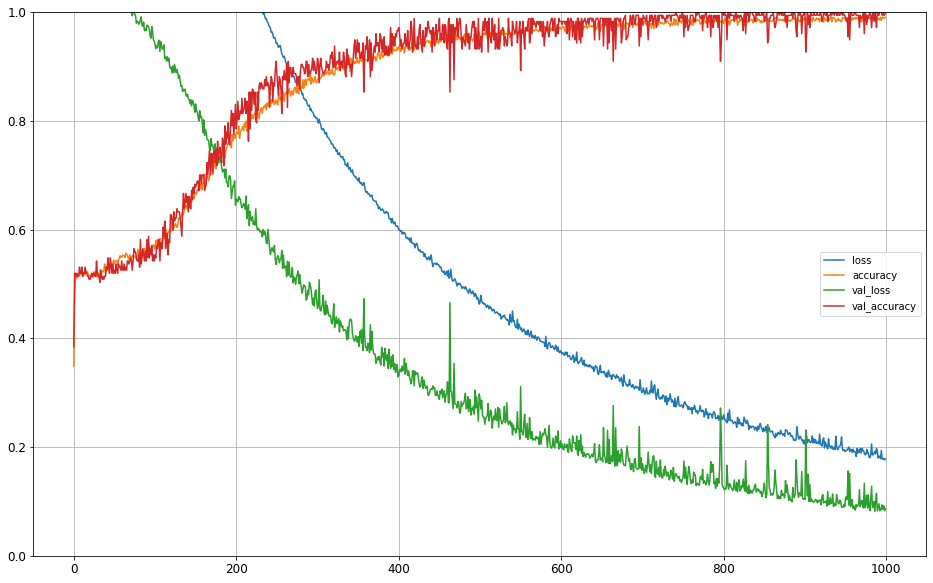

In [269]:
pd.DataFrame(history.history).plot(figsize=(16, 10))
plt.grid(True)
plt.legend(loc="center right")
plt.gca().set_ylim(0, 1)

In [270]:
model.evaluate(X_train_scaled, y_train)

56/56 [==============================] - 0s 382us/step - loss: 0.1113 - accuracy: 0.9909


[0.11126215755939484, 0.9909297227859497]

In [271]:
model.evaluate(X_test_scaled, y_test)

14/14 [==============================] - 0s 385us/step - loss: 0.1078 - accuracy: 0.9864


[0.10783937573432922, 0.9863945841789246]

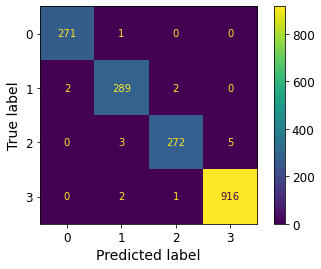

In [272]:
y_train_pred = np.argmax(model.predict(X_train_scaled), axis=-1)

conf_mx = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(conf_mx).plot()

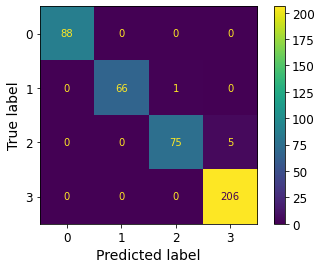

In [273]:
y_test_pred = np.argmax(model.predict(X_test_scaled), axis=-1)

conf_mx = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_mx).plot()

## Wide & deep

In [274]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(4, activation="softmax")(concat)

model = keras.Model(inputs=[input_], outputs=[output])

In [275]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 17)]         0           []                               
                                                                                                  
 dense_48 (Dense)               (None, 30)           540         ['input_4[0][0]']                
                                                                                                  
 dense_49 (Dense)               (None, 30)           930         ['dense_48[0][0]']               
                                                                                                  
 concatenate_3 (Concatenate)    (None, 47)           0           ['input_4[0][0]',                
                                                                  'dense_49[0][0]']         

In [276]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [277]:
class_weight = {0: 2,
                1: 2,
                2: 2,
                3: 1}

early_stopping_cb = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=1000,
                    validation_split=0.1,
                    class_weight=class_weight,
                    callbacks=[early_stopping_cb])

Epoch 1/1000
50/50 [==============================] - 0s 2ms/step - loss: 2.1323 - accuracy: 0.3106 - val_loss: 1.3153 - val_accuracy: 0.3729
Epoch 2/1000
50/50 [==============================] - 0s 674us/step - loss: 1.9981 - accuracy: 0.4468 - val_loss: 1.2671 - val_accuracy: 0.5028
Epoch 3/1000
50/50 [==============================] - 0s 674us/step - loss: 1.9694 - accuracy: 0.5142 - val_loss: 1.2417 - val_accuracy: 0.5198
Epoch 4/1000
50/50 [==============================] - 0s 694us/step - loss: 1.9531 - accuracy: 0.5135 - val_loss: 1.2243 - val_accuracy: 0.5085
Epoch 5/1000
50/50 [==============================] - 0s 674us/step - loss: 1.9355 - accuracy: 0.5123 - val_loss: 1.1926 - val_accuracy: 0.5254
Epoch 6/1000
50/50 [==============================] - 0s 694us/step - loss: 1.9219 - accuracy: 0.5060 - val_loss: 1.1806 - val_accuracy: 0.5198
Epoch 7/1000
50/50 [==============================] - 0s 674us/step - loss: 1.9075 - accuracy: 0.5142 - val_loss: 1.1770 - val_accuracy: 0

50/50 [==============================] - 0s 714us/step - loss: 1.6002 - accuracy: 0.5740 - val_loss: 0.9309 - val_accuracy: 0.5424
Epoch 58/1000
50/50 [==============================] - 0s 694us/step - loss: 1.5952 - accuracy: 0.5671 - val_loss: 0.9258 - val_accuracy: 0.5706
Epoch 59/1000
50/50 [==============================] - 0s 694us/step - loss: 1.5946 - accuracy: 0.5646 - val_loss: 0.9329 - val_accuracy: 0.5763
Epoch 60/1000
50/50 [==============================] - 0s 674us/step - loss: 1.5856 - accuracy: 0.5608 - val_loss: 0.9145 - val_accuracy: 0.5593
Epoch 61/1000
50/50 [==============================] - 0s 714us/step - loss: 1.5810 - accuracy: 0.5784 - val_loss: 0.9210 - val_accuracy: 0.5763
Epoch 62/1000
50/50 [==============================] - 0s 714us/step - loss: 1.5709 - accuracy: 0.5652 - val_loss: 0.9432 - val_accuracy: 0.5706
Epoch 63/1000
50/50 [==============================] - 0s 694us/step - loss: 1.5687 - accuracy: 0.5684 - val_loss: 0.9282 - val_accuracy: 0.5819

50/50 [==============================] - 0s 694us/step - loss: 1.1193 - accuracy: 0.7543 - val_loss: 0.7575 - val_accuracy: 0.6667
Epoch 114/1000
50/50 [==============================] - 0s 674us/step - loss: 1.1468 - accuracy: 0.7360 - val_loss: 0.7937 - val_accuracy: 0.6949
Epoch 115/1000
50/50 [==============================] - 0s 694us/step - loss: 1.0914 - accuracy: 0.7435 - val_loss: 0.5510 - val_accuracy: 0.8644
Epoch 116/1000
50/50 [==============================] - 0s 674us/step - loss: 1.0733 - accuracy: 0.7385 - val_loss: 0.5637 - val_accuracy: 0.7966
Epoch 117/1000
50/50 [==============================] - 0s 674us/step - loss: 1.0548 - accuracy: 0.7524 - val_loss: 0.6222 - val_accuracy: 0.7345
Epoch 118/1000
50/50 [==============================] - 0s 694us/step - loss: 1.0522 - accuracy: 0.7839 - val_loss: 0.7624 - val_accuracy: 0.6949
Epoch 119/1000
50/50 [==============================] - 0s 694us/step - loss: 1.0414 - accuracy: 0.7593 - val_loss: 0.5452 - val_accuracy: 

50/50 [==============================] - 0s 694us/step - loss: 0.7954 - accuracy: 0.8166 - val_loss: 0.5350 - val_accuracy: 0.7514
Epoch 170/1000
50/50 [==============================] - 0s 714us/step - loss: 0.9903 - accuracy: 0.7580 - val_loss: 0.5747 - val_accuracy: 0.7345
Epoch 171/1000
50/50 [==============================] - 0s 692us/step - loss: 0.8133 - accuracy: 0.8261 - val_loss: 0.5123 - val_accuracy: 0.7571
Epoch 172/1000
50/50 [==============================] - 0s 694us/step - loss: 0.9381 - accuracy: 0.7769 - val_loss: 0.3694 - val_accuracy: 0.9153
Epoch 173/1000
50/50 [==============================] - 0s 714us/step - loss: 0.7598 - accuracy: 0.8362 - val_loss: 0.3265 - val_accuracy: 0.9379
Epoch 174/1000
50/50 [==============================] - 0s 694us/step - loss: 0.9753 - accuracy: 0.8248 - val_loss: 0.3898 - val_accuracy: 0.8983
Epoch 175/1000
50/50 [==============================] - 0s 694us/step - loss: 0.7803 - accuracy: 0.8355 - val_loss: 1.0565 - val_accuracy: 

50/50 [==============================] - 0s 714us/step - loss: 0.6479 - accuracy: 0.8916 - val_loss: 0.2194 - val_accuracy: 0.9379
Epoch 226/1000
50/50 [==============================] - 0s 694us/step - loss: 0.6487 - accuracy: 0.8551 - val_loss: 0.2773 - val_accuracy: 0.9492
Epoch 227/1000
50/50 [==============================] - 0s 694us/step - loss: 0.6224 - accuracy: 0.8633 - val_loss: 0.2425 - val_accuracy: 0.9322
Epoch 228/1000
50/50 [==============================] - 0s 694us/step - loss: 0.6983 - accuracy: 0.8362 - val_loss: 0.2431 - val_accuracy: 0.9435
Epoch 229/1000
50/50 [==============================] - 0s 714us/step - loss: 0.5629 - accuracy: 0.8834 - val_loss: 0.2852 - val_accuracy: 0.9040
Epoch 230/1000
50/50 [==============================] - 0s 674us/step - loss: 0.7758 - accuracy: 0.8570 - val_loss: 0.2205 - val_accuracy: 0.9718
Epoch 231/1000
50/50 [==============================] - 0s 694us/step - loss: 0.6814 - accuracy: 0.8563 - val_loss: 0.2177 - val_accuracy: 

50/50 [==============================] - 0s 714us/step - loss: 0.6033 - accuracy: 0.8815 - val_loss: 0.1623 - val_accuracy: 0.9718
Epoch 282/1000
50/50 [==============================] - 0s 674us/step - loss: 0.5903 - accuracy: 0.8822 - val_loss: 0.4930 - val_accuracy: 0.7740
Epoch 283/1000
50/50 [==============================] - 0s 714us/step - loss: 0.5777 - accuracy: 0.8885 - val_loss: 0.3374 - val_accuracy: 0.8418
Epoch 284/1000
50/50 [==============================] - 0s 694us/step - loss: 0.3957 - accuracy: 0.9168 - val_loss: 0.2041 - val_accuracy: 0.9435
Epoch 285/1000
50/50 [==============================] - 0s 674us/step - loss: 0.6263 - accuracy: 0.8859 - val_loss: 0.2246 - val_accuracy: 0.9322
Epoch 286/1000
50/50 [==============================] - 0s 714us/step - loss: 0.4858 - accuracy: 0.8979 - val_loss: 0.3494 - val_accuracy: 0.8136
Epoch 287/1000
50/50 [==============================] - 0s 694us/step - loss: 0.5593 - accuracy: 0.8834 - val_loss: 0.1925 - val_accuracy: 

50/50 [==============================] - 0s 694us/step - loss: 0.5496 - accuracy: 0.8948 - val_loss: 0.1272 - val_accuracy: 0.9718
Epoch 338/1000
50/50 [==============================] - 0s 653us/step - loss: 0.6224 - accuracy: 0.8828 - val_loss: 0.1579 - val_accuracy: 0.9605
Epoch 339/1000
50/50 [==============================] - 0s 694us/step - loss: 0.2698 - accuracy: 0.9502 - val_loss: 0.0968 - val_accuracy: 0.9944
Epoch 340/1000
50/50 [==============================] - 0s 674us/step - loss: 0.2605 - accuracy: 0.9546 - val_loss: 0.1121 - val_accuracy: 0.9774
Epoch 341/1000
50/50 [==============================] - 0s 674us/step - loss: 0.5768 - accuracy: 0.9074 - val_loss: 0.2035 - val_accuracy: 0.9322
Epoch 342/1000
50/50 [==============================] - 0s 674us/step - loss: 0.5584 - accuracy: 0.8866 - val_loss: 0.1575 - val_accuracy: 0.9492
Epoch 343/1000
50/50 [==============================] - 0s 674us/step - loss: 0.2781 - accuracy: 0.9509 - val_loss: 0.1599 - val_accuracy: 

50/50 [==============================] - 0s 694us/step - loss: 0.2376 - accuracy: 0.9578 - val_loss: 0.1285 - val_accuracy: 0.9435
Epoch 394/1000
50/50 [==============================] - 0s 694us/step - loss: 0.2709 - accuracy: 0.9515 - val_loss: 0.0849 - val_accuracy: 0.9944
Epoch 395/1000
50/50 [==============================] - 0s 694us/step - loss: 0.2323 - accuracy: 0.9603 - val_loss: 0.1777 - val_accuracy: 0.9492
Epoch 396/1000
50/50 [==============================] - 0s 694us/step - loss: 0.2452 - accuracy: 0.9546 - val_loss: 0.1167 - val_accuracy: 0.9605
Epoch 397/1000
50/50 [==============================] - 0s 714us/step - loss: 0.3906 - accuracy: 0.9263 - val_loss: 0.0874 - val_accuracy: 0.9718
Epoch 398/1000
50/50 [==============================] - 0s 694us/step - loss: 0.2338 - accuracy: 0.9616 - val_loss: 0.0915 - val_accuracy: 0.9661
Epoch 399/1000
50/50 [==============================] - 0s 694us/step - loss: 0.5281 - accuracy: 0.8986 - val_loss: 0.0890 - val_accuracy: 

50/50 [==============================] - 0s 694us/step - loss: 0.2739 - accuracy: 0.9534 - val_loss: 0.0593 - val_accuracy: 0.9944
Epoch 450/1000
50/50 [==============================] - 0s 674us/step - loss: 0.4251 - accuracy: 0.9301 - val_loss: 0.0972 - val_accuracy: 0.9548
Epoch 451/1000
50/50 [==============================] - 0s 714us/step - loss: 0.4445 - accuracy: 0.9175 - val_loss: 0.1153 - val_accuracy: 0.9548
Epoch 452/1000
50/50 [==============================] - 0s 714us/step - loss: 0.2184 - accuracy: 0.9572 - val_loss: 0.6557 - val_accuracy: 0.7797
Epoch 453/1000
50/50 [==============================] - 0s 714us/step - loss: 0.4087 - accuracy: 0.9219 - val_loss: 0.0723 - val_accuracy: 0.9831
Epoch 454/1000
50/50 [==============================] - 0s 694us/step - loss: 0.2142 - accuracy: 0.9578 - val_loss: 0.1299 - val_accuracy: 0.9322
Epoch 455/1000
50/50 [==============================] - 0s 714us/step - loss: 0.1636 - accuracy: 0.9748 - val_loss: 0.3429 - val_accuracy: 

50/50 [==============================] - 0s 714us/step - loss: 0.1234 - accuracy: 0.9824 - val_loss: 0.0500 - val_accuracy: 0.9944
Epoch 506/1000
50/50 [==============================] - 0s 714us/step - loss: 0.7848 - accuracy: 0.8670 - val_loss: 0.0657 - val_accuracy: 0.9887
Epoch 507/1000
50/50 [==============================] - 0s 694us/step - loss: 0.1323 - accuracy: 0.9842 - val_loss: 0.0485 - val_accuracy: 0.9944
Epoch 508/1000
50/50 [==============================] - 0s 694us/step - loss: 0.1239 - accuracy: 0.9842 - val_loss: 0.0476 - val_accuracy: 0.9944
Epoch 509/1000
50/50 [==============================] - 0s 694us/step - loss: 0.1283 - accuracy: 0.9786 - val_loss: 0.2456 - val_accuracy: 0.8814
Epoch 510/1000
50/50 [==============================] - 0s 694us/step - loss: 0.3458 - accuracy: 0.9401 - val_loss: 0.0635 - val_accuracy: 0.9831
Epoch 511/1000
50/50 [==============================] - 0s 694us/step - loss: 0.2532 - accuracy: 0.9527 - val_loss: 0.2186 - val_accuracy: 

50/50 [==============================] - 0s 674us/step - loss: 0.1122 - accuracy: 0.9880 - val_loss: 0.0514 - val_accuracy: 0.9831
Epoch 562/1000
50/50 [==============================] - 0s 674us/step - loss: 0.1142 - accuracy: 0.9836 - val_loss: 0.1946 - val_accuracy: 0.9379
Epoch 563/1000
50/50 [==============================] - 0s 674us/step - loss: 0.0992 - accuracy: 0.9880 - val_loss: 0.0371 - val_accuracy: 0.9944
Epoch 564/1000
50/50 [==============================] - 0s 674us/step - loss: 0.1101 - accuracy: 0.9811 - val_loss: 0.0636 - val_accuracy: 0.9831
Epoch 565/1000
50/50 [==============================] - 0s 674us/step - loss: 0.5757 - accuracy: 0.9149 - val_loss: 0.0518 - val_accuracy: 0.9944
Epoch 566/1000
50/50 [==============================] - 0s 653us/step - loss: 0.1465 - accuracy: 0.9704 - val_loss: 0.0422 - val_accuracy: 0.9944
Epoch 567/1000
50/50 [==============================] - 0s 674us/step - loss: 0.1776 - accuracy: 0.9672 - val_loss: 0.1014 - val_accuracy: 

50/50 [==============================] - 0s 674us/step - loss: 0.0956 - accuracy: 0.9868 - val_loss: 0.4728 - val_accuracy: 0.8588
Epoch 618/1000
50/50 [==============================] - 0s 674us/step - loss: 0.4127 - accuracy: 0.9376 - val_loss: 0.0344 - val_accuracy: 0.9944
Epoch 619/1000
50/50 [==============================] - 0s 674us/step - loss: 0.0837 - accuracy: 0.9893 - val_loss: 0.0364 - val_accuracy: 1.0000
Epoch 620/1000
50/50 [==============================] - 0s 694us/step - loss: 0.0926 - accuracy: 0.9849 - val_loss: 0.0349 - val_accuracy: 1.0000
Epoch 621/1000
50/50 [==============================] - 0s 674us/step - loss: 0.0902 - accuracy: 0.9887 - val_loss: 0.0325 - val_accuracy: 1.0000
Epoch 622/1000
50/50 [==============================] - 0s 694us/step - loss: 0.0915 - accuracy: 0.9880 - val_loss: 0.0272 - val_accuracy: 1.0000
Epoch 623/1000
50/50 [==============================] - 0s 674us/step - loss: 0.0849 - accuracy: 0.9918 - val_loss: 0.2136 - val_accuracy: 

50/50 [==============================] - 0s 694us/step - loss: 0.1805 - accuracy: 0.9710 - val_loss: 0.0720 - val_accuracy: 0.9661
Epoch 674/1000
50/50 [==============================] - 0s 674us/step - loss: 0.1106 - accuracy: 0.9786 - val_loss: 0.0322 - val_accuracy: 0.9944
Epoch 675/1000
50/50 [==============================] - 0s 694us/step - loss: 0.1019 - accuracy: 0.9836 - val_loss: 0.0887 - val_accuracy: 0.9661
Epoch 676/1000
50/50 [==============================] - 0s 674us/step - loss: 0.1002 - accuracy: 0.9830 - val_loss: 0.0465 - val_accuracy: 1.0000
Epoch 677/1000
50/50 [==============================] - 0s 694us/step - loss: 0.0864 - accuracy: 0.9874 - val_loss: 0.0567 - val_accuracy: 0.9661
Epoch 678/1000
50/50 [==============================] - 0s 674us/step - loss: 0.1066 - accuracy: 0.9786 - val_loss: 0.0955 - val_accuracy: 0.9548
Epoch 679/1000
50/50 [==============================] - 0s 674us/step - loss: 0.0971 - accuracy: 0.9842 - val_loss: 0.1784 - val_accuracy: 

50/50 [==============================] - 0s 674us/step - loss: 0.1058 - accuracy: 0.9830 - val_loss: 0.0533 - val_accuracy: 0.9718
Epoch 730/1000
50/50 [==============================] - 0s 674us/step - loss: 0.2398 - accuracy: 0.9565 - val_loss: 0.0480 - val_accuracy: 0.9887
Epoch 731/1000
50/50 [==============================] - 0s 674us/step - loss: 0.0841 - accuracy: 0.9874 - val_loss: 0.0289 - val_accuracy: 1.0000
Epoch 732/1000
50/50 [==============================] - 0s 694us/step - loss: 0.0789 - accuracy: 0.9874 - val_loss: 0.0944 - val_accuracy: 0.9661
Epoch 733/1000
50/50 [==============================] - 0s 694us/step - loss: 0.1092 - accuracy: 0.9786 - val_loss: 0.0432 - val_accuracy: 0.9831
Epoch 734/1000
50/50 [==============================] - 0s 694us/step - loss: 0.0952 - accuracy: 0.9830 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 735/1000
50/50 [==============================] - 0s 694us/step - loss: 0.0702 - accuracy: 0.9899 - val_loss: 0.0262 - val_accuracy: 

50/50 [==============================] - 0s 694us/step - loss: 0.1173 - accuracy: 0.9754 - val_loss: 0.0776 - val_accuracy: 0.9661
Epoch 786/1000
50/50 [==============================] - 0s 674us/step - loss: 0.2195 - accuracy: 0.9609 - val_loss: 0.2184 - val_accuracy: 0.9209
Epoch 787/1000
50/50 [==============================] - 0s 674us/step - loss: 0.3772 - accuracy: 0.9427 - val_loss: 0.0333 - val_accuracy: 1.0000
Epoch 788/1000
50/50 [==============================] - 0s 674us/step - loss: 0.0637 - accuracy: 0.9950 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 789/1000
50/50 [==============================] - 0s 674us/step - loss: 0.4239 - accuracy: 0.9389 - val_loss: 0.1192 - val_accuracy: 0.9209
Epoch 790/1000
50/50 [==============================] - 0s 653us/step - loss: 0.1239 - accuracy: 0.9742 - val_loss: 0.0248 - val_accuracy: 0.9944
Epoch 791/1000
50/50 [==============================] - 0s 653us/step - loss: 0.0951 - accuracy: 0.9855 - val_loss: 0.0209 - val_accuracy: 

50/50 [==============================] - 0s 694us/step - loss: 0.0584 - accuracy: 0.9924 - val_loss: 0.0426 - val_accuracy: 0.9718
Epoch 842/1000
50/50 [==============================] - 0s 674us/step - loss: 0.0569 - accuracy: 0.9918 - val_loss: 0.0396 - val_accuracy: 0.9831
Epoch 843/1000
50/50 [==============================] - 0s 674us/step - loss: 0.0861 - accuracy: 0.9849 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 844/1000
50/50 [==============================] - 0s 674us/step - loss: 0.0523 - accuracy: 0.9924 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 845/1000
50/50 [==============================] - 0s 674us/step - loss: 0.0704 - accuracy: 0.9893 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 846/1000
50/50 [==============================] - 0s 694us/step - loss: 0.0734 - accuracy: 0.9887 - val_loss: 0.0187 - val_accuracy: 1.0000
Epoch 847/1000
50/50 [==============================] - 0s 694us/step - loss: 0.1052 - accuracy: 0.9786 - val_loss: 0.0381 - val_accuracy: 

50/50 [==============================] - 0s 674us/step - loss: 0.0532 - accuracy: 0.9931 - val_loss: 0.0426 - val_accuracy: 0.9887
Epoch 898/1000
50/50 [==============================] - 0s 674us/step - loss: 0.0530 - accuracy: 0.9918 - val_loss: 0.0229 - val_accuracy: 1.0000
Epoch 899/1000
50/50 [==============================] - 0s 674us/step - loss: 0.5525 - accuracy: 0.9143 - val_loss: 0.0452 - val_accuracy: 0.9887
Epoch 900/1000
50/50 [==============================] - 0s 694us/step - loss: 0.0561 - accuracy: 0.9943 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 901/1000
50/50 [==============================] - 0s 694us/step - loss: 0.0539 - accuracy: 0.9912 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 902/1000
50/50 [==============================] - 0s 674us/step - loss: 0.0681 - accuracy: 0.9880 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 903/1000
50/50 [==============================] - 0s 674us/step - loss: 0.0474 - accuracy: 0.9950 - val_loss: 0.0132 - val_accuracy: 

50/50 [==============================] - 0s 674us/step - loss: 0.0557 - accuracy: 0.9912 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 954/1000
50/50 [==============================] - 0s 653us/step - loss: 0.2795 - accuracy: 0.9527 - val_loss: 0.0303 - val_accuracy: 0.9831
Epoch 955/1000
50/50 [==============================] - 0s 674us/step - loss: 0.0577 - accuracy: 0.9912 - val_loss: 0.0179 - val_accuracy: 0.9944
Epoch 956/1000
50/50 [==============================] - 0s 694us/step - loss: 0.0487 - accuracy: 0.9912 - val_loss: 0.0198 - val_accuracy: 0.9944
Epoch 957/1000
50/50 [==============================] - 0s 674us/step - loss: 0.5859 - accuracy: 0.9036 - val_loss: 0.0378 - val_accuracy: 0.9887
Epoch 958/1000
50/50 [==============================] - 0s 674us/step - loss: 0.0688 - accuracy: 0.9893 - val_loss: 0.0285 - val_accuracy: 0.9944
Epoch 959/1000
50/50 [==============================] - 0s 694us/step - loss: 0.0574 - accuracy: 0.9918 - val_loss: 0.2235 - val_accuracy: 

(0.0, 1.0)

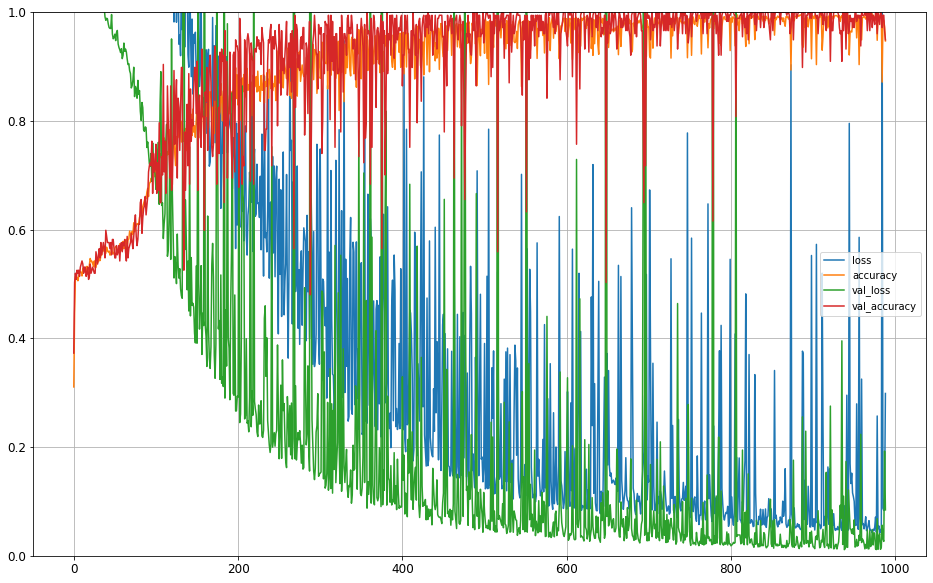

In [278]:
pd.DataFrame(history.history).plot(figsize=(16, 10))
plt.grid(True)
plt.legend(loc="center right")
plt.gca().set_ylim(0, 1)

In [279]:
model.evaluate(X_train_scaled, y_train)

56/56 [==============================] - 0s 382us/step - loss: 0.0218 - accuracy: 0.9966


[0.021804651245474815, 0.9965986609458923]

In [280]:
model.evaluate(X_test_scaled, y_test)

14/14 [==============================] - 0s 385us/step - loss: 0.0288 - accuracy: 0.9932


[0.028830112889409065, 0.9931972622871399]

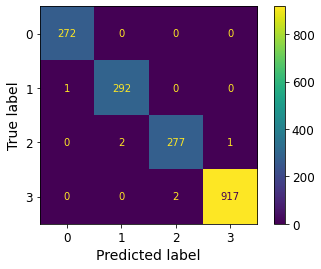

In [281]:
y_train_pred = np.argmax(model.predict(X_train_scaled), axis=-1)

conf_mx = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(conf_mx).plot()

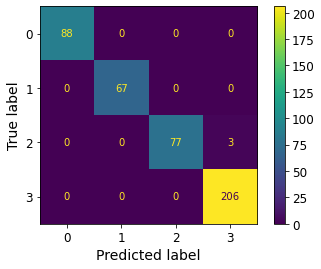

In [282]:
y_test_pred = np.argmax(model.predict(X_test_scaled), axis=-1)

conf_mx = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(conf_mx).plot()